# <font color="MediumVioletRed">Project 2 - Deep Learning - CIFAR10 dataset - Karin Shulman Goren</font>

## Student details:

## Imports:

In [2]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import Subset
import matplotlib.pyplot as plt

## Turn data into tensors and create train and test splits:

In [3]:
# Define a transform to normalize the data
data_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Download and split data into train and test sets
train_set = datasets.CIFAR10(root='./CIFAR10data', train=True, download=True, transform = data_transform)
test_set = datasets.CIFAR10(root='./CIFAR10data', train=False, download=True, transform = data_transform)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


## Exploring the data:

In [4]:
print("Train set samples = " , len(train_set))
print("Test set samples = " , len(test_set))

Train set samples =  50000
Test set samples =  10000


In [5]:
# Examine the data:
def class_plot_dist(data, chart_title, bar_color, classes):
    labels = [label for k, label in data]
    unique_labels, counts = np.unique(labels, return_counts=True)
    class_labels = [classes[label] for label in unique_labels]
    
    plt.bar(class_labels, counts, color=bar_color)
    plt.title(chart_title)
    plt.xlabel('Class')
    plt.ylabel('Samples')
    plt.xticks(rotation = 55)  
    plt.show()

In [6]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

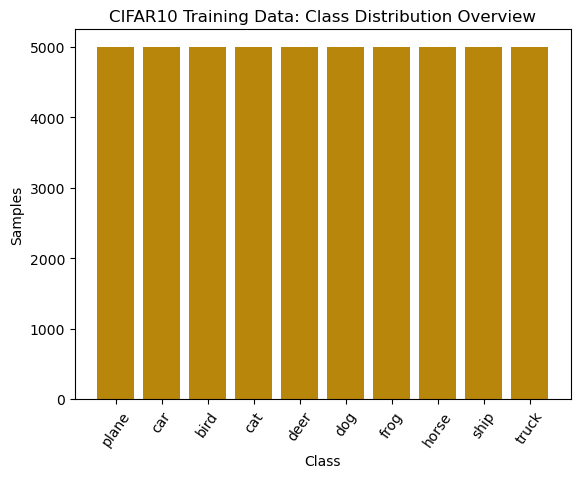

In [7]:
# Examine train_set class distribution:
class_plot_dist(train_set, 'CIFAR10 Training Data: Class Distribution Overview', 'darkgoldenrod', classes)

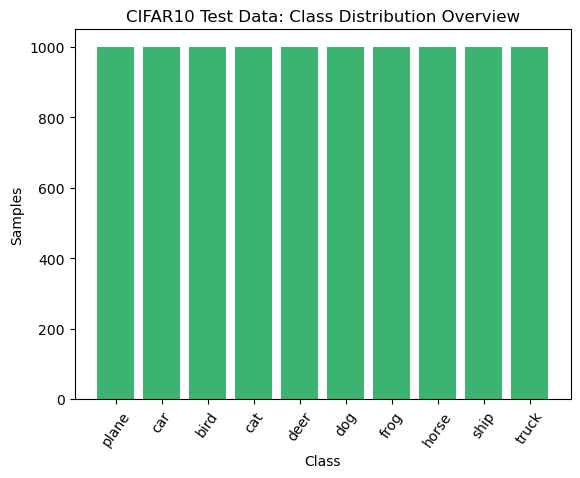

In [8]:
# Examine test_set class distribution:
class_plot_dist(test_set, 'CIFAR10 Test Data: Class Distribution Overview', 'mediumseagreen', classes)

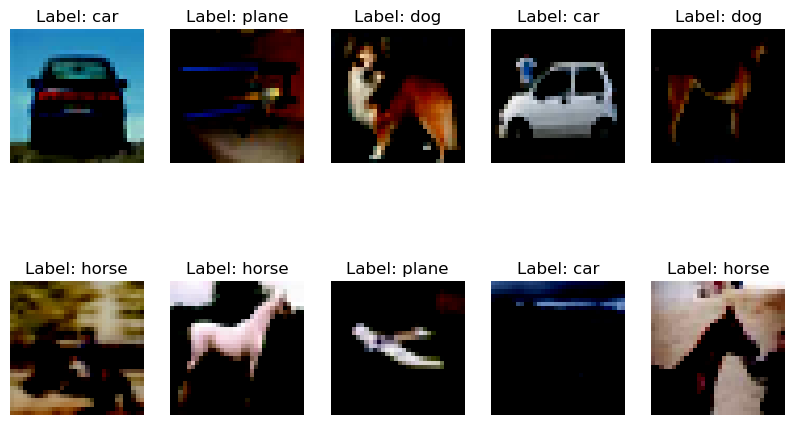

In [9]:
from IPython.display import clear_output
# Creating DataLoader:
trainloader_samples = torch.utils.data.DataLoader(train_set, batch_size = 10, shuffle = True);

# Iterating through DataLoader:
for img, label in trainloader_samples:
    break
    
def show_samples(images, titles):
    rows = 2
    cols = 5

    fig, axes = plt.subplots(rows, cols, figsize = (10, 6));
    for i in range(rows):
        for j in range(cols):
            index = i * cols + j
            axes[i, j].imshow(images[index]);
            axes[i, j].set_title(f"Label: {titles[index]}");
            axes[i, j].axis('off');
    
    clear_output()
    plt.show()

class_names = [classes[label] for label in label.numpy()]

# Showing the images with the class names in subplots:
show_samples(img.permute(0, 2, 3, 1).squeeze(), class_names);

## Design Deep Neural Networks:

### Split data into train and validation sets:

In [10]:
# Preparing for validaion test:
indices = np.random.permutation(len(train_set)) #shuffle
val_size = 0.2

num_samples = len(train_set)
num_valid = int(val_size * num_samples)
num_train = num_samples - num_valid

train_indices = indices[:num_train]
valid_indices = indices[num_train:]

train_subset = Subset(train_set, train_indices)
valid_subset = Subset(train_set, valid_indices)

train_loader = torch.utils.data.DataLoader(train_subset, batch_size=len(train_subset))
valid_loader = torch.utils.data.DataLoader(valid_subset, batch_size=len(valid_subset))
test_loader = torch.utils.data.DataLoader(test_set, batch_size=len(test_set))

### Functions we will use:

In [11]:
# Calculating accuracy index between true and predicted values:
def accuracy_index(y_true, y_pred):
    true_vals = torch.eq(y_true, y_pred).sum().item() 
    accur = (true_vals / len(y_pred)) * 100 
    return accur

In [12]:
def visualize_loss(train_loss, test_loss):
    epochs = range(1, len(train_loss) + 1)
    fig, ax = plt.subplots(figsize=(10, 4))
    plt.plot(epochs, [loss.item() for loss in train_loss], label='Training Loss', color='mediumvioletred')
    plt.plot(epochs, [loss.item() for loss in test_loss], label='Validation Loss', color='royalblue')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Comparison of Training and Validation Loss Evolution Over Epochs')
    plt.legend()
    plt.show()

### CNNModule with five hidden layers:
- ReLU activation function.
- Two convolutional layers with a kernel size of 5x5 apply 2D max pooling over an input signal using a 2x2 kernel size and a stride size of 2. 
- Three linear layers.

In [13]:
class CNNNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=6,kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6,out_channels=12,kernel_size=5)
        self.fc1 = nn.Linear(in_features=12*5*5,out_features=120)
        self.fc2 = nn.Linear(in_features=120,out_features=60)
        self.fc3 = nn.Linear(in_features=60,out_features=40)
        self.out = nn.Linear(in_features=40,out_features=10)
        
    def forward(self,x):
        #input layer
        x = x
        #first hidden layer
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x,kernel_size=2,stride=2)
        #second hidden layer
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x,kernel_size=2,stride=2)
        #third hidden layer
        x = x.reshape(-1,12*5*5)
        x = self.fc1(x)
        x = F.relu(x)
        #fourth hidden layer
        x = self.fc2(x)
        x = F.relu(x)
        #fifth hidden layer
        x = self.fc3(x)
        x = F.relu(x)
        #output layer
        x = self.out(x)
        return x


### CNNModule with five hidden layers:
- ReLU activation function.
- Three convolutional layers with a 3x3 kernel size and a padding size of 1 apply 2D max pooling over an input signal with a 2x2 kernel size and a stride size of 2.
- Two linear layers.

In [14]:
class CNNNetwork2(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(in_features=64*4*4, out_features=256)
        self.fc2 = nn.Linear(in_features=256, out_features=128)
        self.out = nn.Linear(in_features=128, out_features=10)

    def forward(self, x):
        # input layer
        x = x
        # first hidden layer
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        # second hidden layer
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        # third hidden layer
        x = self.conv3(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        # flatten
        x = x.view(-1, 64*4*4)
        # fourth hidden layer
        x = self.fc1(x)
        x = F.relu(x)
        # fifth hidden layer
        x = self.fc2(x)
        x = F.relu(x)
        # output layer
        x = self.out(x)
        return x


### CNNModule with five hidden layers and dropout regularization:
- ReLU activation function.
- Three convolutional layers with a 3x3 kernel size and a padding size of 1 apply 2D max pooling over an input signal with a 2x2 kernel size and a stride size of 2.
- Two linear layers.
- Dropout applied to the fully connected layers with the specified dropout rate.

In [15]:
class CNNNetworkWithDropout(nn.Module):
    def __init__(self, dropout_rate):
        super(CNNNetworkWithDropout, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(in_features=64*4*4, out_features=256)
        self.fc2 = nn.Linear(in_features=256, out_features=128)
        self.out = nn.Linear(in_features=128, out_features=10)
        self.dropout = nn.Dropout(p = dropout_rate)  

    def forward(self, x):
        # input layer
        x = x
        # first hidden layer
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        # second hidden layer
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        # third hidden layer
        x = self.conv3(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        # flatten
        x = x.view(-1, 64*4*4)
        # dropout regularization
        x = self.dropout(x)
        # fourth hidden layer
        x = self.fc1(x)
        x = F.relu(x)
        # dropout regularization
        x = self.dropout(x)
        # fifth hidden layer
        x = self.fc2(x)
        x = F.relu(x)
        # dropout regularization
        x = self.dropout(x)
        # output layer
        x = self.out(x)
        return x


## Overfitting prevention:
- Using Fewer Neurons
- Using L2 Regularization Method and Dropout Method
- Early Stopping

## GD - Gradient Descent:

In [16]:
def model_gd(epochs, lr, model, l2, batch_size, early_stop = 5):
    ModelGD = model
    loss_func = nn.CrossEntropyLoss()
    optimizer = optim.SGD(ModelGD.parameters(), lr=lr, weight_decay=l2)
    num_epochs = epochs
    train_size = len(train_subset)

    loss_train = []
    loss_val_list = [] 
    
    min_loss = np.Inf
    early_stop_count = 0
    
    train_loader = torch.utils.data.DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    valid_loader = torch.utils.data.DataLoader(valid_subset, batch_size=len(valid_subset))
    
    for epoch in range(num_epochs):
        # Training
        ModelGD.train()
        total_loss = 0
        for batch_idx, (data, target) in enumerate(train_loader):
           
            # 1. Forward pass
            output = ModelGD(data)
    
            # 2. Calculate loss
            loss = loss_func(output, target)
            total_loss += loss

            # 3. Optimizer zero grad
            optimizer.zero_grad()

            # 4. Loss backwards
            loss.backward()

            # 5. Optimizer step
            optimizer.step()
            
        total_loss /= (train_size / batch_size)
        loss_train.append(total_loss)

        # Testing
        ModelGD.eval()
        with torch.inference_mode():
            for batch_idx, (data, target) in enumerate(valid_loader):
                
                # 1. Forward pass
                output_val = ModelGD(data)
                pred_val = torch.softmax(output_val, dim=1).argmax(dim=1)
            
                # 2. Calculate test loss and accuracy
                loss_val = loss_func(output_val, target)
                acc_val = accuracy_index(target, pred_val)
            
            loss_val_list.append(loss_val)
            
            # Early stopping
            if loss_val < min_loss:
                min_loss = loss_val
                early_stop_count = 0
            else:
                early_stop_count += 1
                if early_stop_count == early_stop:
                    print(f'Early stopping at epoch {epoch},with {min_loss:.5f} validation loss')
                    break
        
            for batch_idx, (data, target) in enumerate(train_loader):
                
                # 1. Forward pass
                output_train = ModelGD(data)
                pred_train = torch.softmax(output_train, dim=1).argmax(dim=1)
            
                # 2. Calculate train accuracy
                acc_train = accuracy_index(target, pred_train)
        
        if epoch % 5 == 0 or epoch == (num_epochs - 1):

            print(f"Epoch: {epoch} | Loss: {total_loss:.5f}, Acc: {acc_train:.2f}% | Validation Loss: {loss_val:.5f}, Validation Acc: {acc_val:.2f}%")

            
    return loss_train, loss_val_list

## BGD - Batch Gradient Descent:

### Utilizing varied hyperparameters for the model_bgd:

Epoch: 0 | Loss: 2.30684, Acc: 9.95% | Validation Loss: 2.30704, Validation Acc: 10.20%
Epoch: 5 | Loss: 2.30676, Acc: 9.95% | Validation Loss: 2.30696, Validation Acc: 10.20%
Epoch: 10 | Loss: 2.30668, Acc: 9.95% | Validation Loss: 2.30688, Validation Acc: 10.20%
Epoch: 15 | Loss: 2.30660, Acc: 9.95% | Validation Loss: 2.30680, Validation Acc: 10.20%
Epoch: 20 | Loss: 2.30652, Acc: 9.95% | Validation Loss: 2.30672, Validation Acc: 10.20%
Epoch: 25 | Loss: 2.30644, Acc: 9.95% | Validation Loss: 2.30664, Validation Acc: 10.20%
Epoch: 30 | Loss: 2.30636, Acc: 9.95% | Validation Loss: 2.30657, Validation Acc: 10.20%
Epoch: 35 | Loss: 2.30629, Acc: 9.95% | Validation Loss: 2.30649, Validation Acc: 10.20%
Epoch: 40 | Loss: 2.30622, Acc: 9.95% | Validation Loss: 2.30642, Validation Acc: 10.20%
Epoch: 45 | Loss: 2.30614, Acc: 9.95% | Validation Loss: 2.30635, Validation Acc: 10.20%
Epoch: 49 | Loss: 2.30608, Acc: 9.95% | Validation Loss: 2.30629, Validation Acc: 10.20%


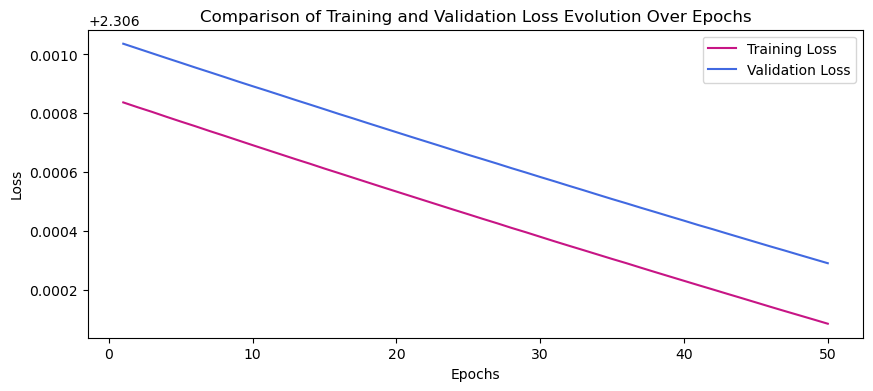

In [17]:
# num_epochs = 50, lr = 0.01, Two convolutional layers, l2 = 0, batch_size = len(train_subset): 
model_bgd1 = CNNNetwork()
loss_train, loss_val_list = model_gd(50, 0.01, model_bgd1, 0, len(train_subset))
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.30629, Acc: 9.97% | Validation Loss: 2.30629, Validation Acc: 10.13%
Epoch: 5 | Loss: 2.30569, Acc: 9.97% | Validation Loss: 2.30570, Validation Acc: 10.13%
Epoch: 10 | Loss: 2.30516, Acc: 9.97% | Validation Loss: 2.30518, Validation Acc: 10.13%
Epoch: 15 | Loss: 2.30469, Acc: 9.96% | Validation Loss: 2.30472, Validation Acc: 10.13%
Epoch: 20 | Loss: 2.30427, Acc: 9.96% | Validation Loss: 2.30432, Validation Acc: 10.13%
Epoch: 25 | Loss: 2.30390, Acc: 10.05% | Validation Loss: 2.30396, Validation Acc: 10.13%
Epoch: 30 | Loss: 2.30356, Acc: 10.33% | Validation Loss: 2.30363, Validation Acc: 10.46%
Epoch: 35 | Loss: 2.30326, Acc: 11.17% | Validation Loss: 2.30333, Validation Acc: 11.04%
Epoch: 40 | Loss: 2.30298, Acc: 12.46% | Validation Loss: 2.30307, Validation Acc: 12.10%
Epoch: 45 | Loss: 2.30273, Acc: 12.75% | Validation Loss: 2.30282, Validation Acc: 12.68%
Epoch: 49 | Loss: 2.30254, Acc: 12.60% | Validation Loss: 2.30264, Validation Acc: 12.48%


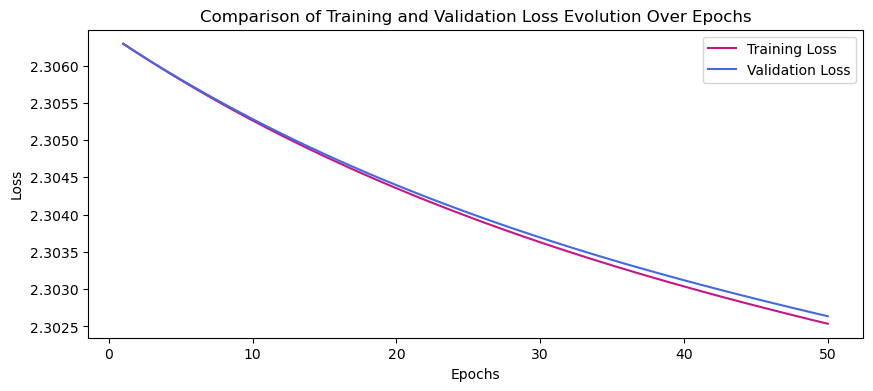

In [18]:
# num_epochs = 50, lr = 0.1, Two convolutional layers, l2 = 0, batch_size = len(train_subset):  
model_bgd2 = CNNNetwork()
loss_train, loss_val_list = model_gd(50, 0.1, model_bgd2, 0, len(train_subset))
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.30349, Acc: 9.97% | Validation Loss: 2.30304, Validation Acc: 10.13%
Epoch: 5 | Loss: 2.30345, Acc: 9.97% | Validation Loss: 2.30301, Validation Acc: 10.13%
Epoch: 10 | Loss: 2.30342, Acc: 9.97% | Validation Loss: 2.30298, Validation Acc: 10.13%
Epoch: 15 | Loss: 2.30339, Acc: 9.97% | Validation Loss: 2.30296, Validation Acc: 10.13%
Epoch: 20 | Loss: 2.30336, Acc: 9.97% | Validation Loss: 2.30293, Validation Acc: 10.13%
Epoch: 25 | Loss: 2.30333, Acc: 9.97% | Validation Loss: 2.30291, Validation Acc: 10.13%
Epoch: 30 | Loss: 2.30330, Acc: 9.97% | Validation Loss: 2.30288, Validation Acc: 10.13%
Epoch: 35 | Loss: 2.30327, Acc: 9.97% | Validation Loss: 2.30286, Validation Acc: 10.13%
Epoch: 40 | Loss: 2.30324, Acc: 9.97% | Validation Loss: 2.30283, Validation Acc: 10.13%
Epoch: 45 | Loss: 2.30322, Acc: 9.97% | Validation Loss: 2.30281, Validation Acc: 10.13%
Epoch: 50 | Loss: 2.30319, Acc: 9.97% | Validation Loss: 2.30278, Validation Acc: 10.13%
Epoch: 55 | Loss: 2.303

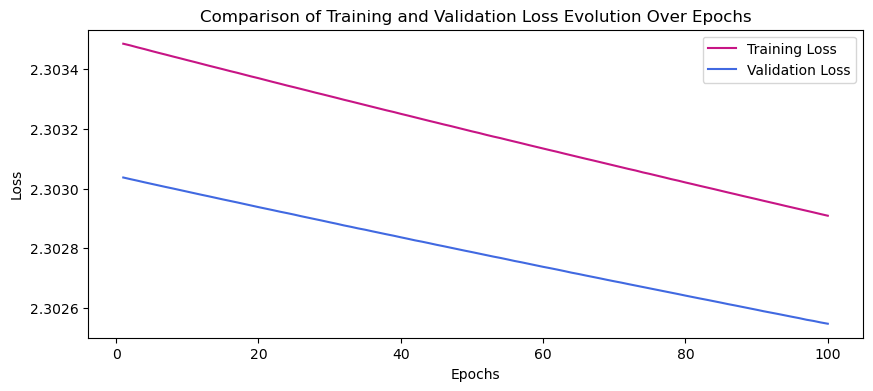

In [19]:
# num_epochs = 100, lr = 0.01, Three convolutional layers, l2 = 0, batch_size = len(train_subset):  
model_bgd3 = CNNNetwork2()
loss_train, loss_val_list = model_gd(100, 0.01, model_bgd3, 0, len(train_subset))
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.30461, Acc: 10.22% | Validation Loss: 2.30485, Validation Acc: 9.50%
Epoch: 5 | Loss: 2.30418, Acc: 10.24% | Validation Loss: 2.30443, Validation Acc: 9.51%
Epoch: 10 | Loss: 2.30380, Acc: 10.28% | Validation Loss: 2.30405, Validation Acc: 9.53%
Epoch: 15 | Loss: 2.30345, Acc: 10.31% | Validation Loss: 2.30371, Validation Acc: 9.54%
Epoch: 20 | Loss: 2.30314, Acc: 10.33% | Validation Loss: 2.30339, Validation Acc: 9.61%
Epoch: 25 | Loss: 2.30285, Acc: 10.35% | Validation Loss: 2.30310, Validation Acc: 9.61%
Epoch: 30 | Loss: 2.30258, Acc: 10.40% | Validation Loss: 2.30283, Validation Acc: 9.68%
Epoch: 35 | Loss: 2.30233, Acc: 10.42% | Validation Loss: 2.30258, Validation Acc: 9.72%
Epoch: 40 | Loss: 2.30209, Acc: 10.42% | Validation Loss: 2.30235, Validation Acc: 9.78%
Epoch: 45 | Loss: 2.30187, Acc: 10.43% | Validation Loss: 2.30212, Validation Acc: 9.81%
Epoch: 50 | Loss: 2.30165, Acc: 10.47% | Validation Loss: 2.30190, Validation Acc: 9.82%
Epoch: 55 | Loss: 2.301

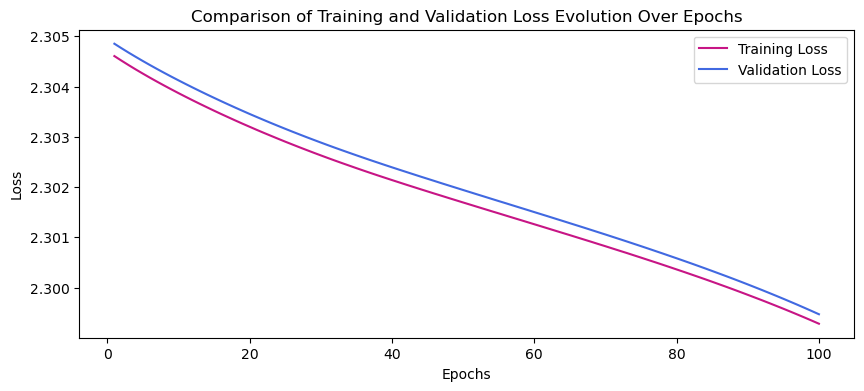

In [20]:
# num_epochs = 100, lr = 0.1, Three convolutional layers, l2 = 0, batch_size = len(train_subset):  
model_bgd4 = CNNNetwork2()
loss_train, loss_val_list = model_gd(100, 0.1, model_bgd4, 0, len(train_subset))
visualize_loss(loss_train, loss_val_list)

### model_bgd_dropout:

Epoch: 0 | Loss: 2.30412, Acc: 10.01% | Validation Loss: 2.30371, Validation Acc: 9.98%
Epoch: 5 | Loss: 2.30407, Acc: 10.01% | Validation Loss: 2.30366, Validation Acc: 9.98%
Epoch: 10 | Loss: 2.30407, Acc: 10.01% | Validation Loss: 2.30361, Validation Acc: 9.98%
Epoch: 15 | Loss: 2.30404, Acc: 10.01% | Validation Loss: 2.30356, Validation Acc: 9.98%
Epoch: 20 | Loss: 2.30402, Acc: 10.01% | Validation Loss: 2.30352, Validation Acc: 9.98%
Epoch: 25 | Loss: 2.30394, Acc: 10.01% | Validation Loss: 2.30347, Validation Acc: 9.98%
Epoch: 30 | Loss: 2.30386, Acc: 10.01% | Validation Loss: 2.30342, Validation Acc: 9.98%
Epoch: 35 | Loss: 2.30381, Acc: 10.01% | Validation Loss: 2.30338, Validation Acc: 9.98%
Epoch: 40 | Loss: 2.30374, Acc: 10.01% | Validation Loss: 2.30333, Validation Acc: 9.98%
Epoch: 45 | Loss: 2.30372, Acc: 10.01% | Validation Loss: 2.30328, Validation Acc: 9.98%
Epoch: 50 | Loss: 2.30369, Acc: 10.01% | Validation Loss: 2.30324, Validation Acc: 9.98%
Epoch: 55 | Loss: 2.303

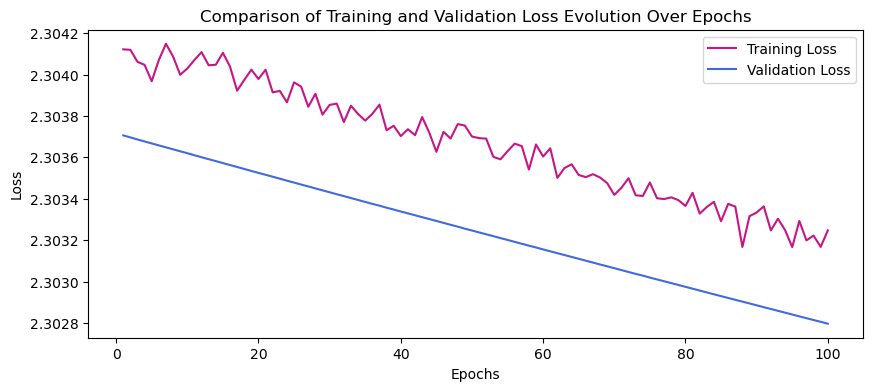

In [21]:
# num_epochs = 100, lr = 0.01, Three convolutional layers with Dropout, dropout = 0.2, l2 = 0, batch_size = len(train_subset):  
model_bgd_drop1 = CNNNetworkWithDropout(0.2)
loss_train, loss_val_list = model_gd(100, 0.01, model_bgd_drop1, 0, len(train_subset))
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.30390, Acc: 10.14% | Validation Loss: 2.30374, Validation Acc: 10.40%
Epoch: 5 | Loss: 2.30381, Acc: 10.17% | Validation Loss: 2.30370, Validation Acc: 10.43%
Epoch: 10 | Loss: 2.30366, Acc: 10.18% | Validation Loss: 2.30366, Validation Acc: 10.47%
Epoch: 15 | Loss: 2.30369, Acc: 10.21% | Validation Loss: 2.30362, Validation Acc: 10.52%
Epoch: 20 | Loss: 2.30351, Acc: 10.25% | Validation Loss: 2.30358, Validation Acc: 10.54%
Epoch: 25 | Loss: 2.30376, Acc: 10.29% | Validation Loss: 2.30353, Validation Acc: 10.59%
Epoch: 30 | Loss: 2.30347, Acc: 10.33% | Validation Loss: 2.30349, Validation Acc: 10.63%
Epoch: 35 | Loss: 2.30353, Acc: 10.39% | Validation Loss: 2.30345, Validation Acc: 10.69%
Epoch: 40 | Loss: 2.30341, Acc: 10.44% | Validation Loss: 2.30341, Validation Acc: 10.80%
Epoch: 45 | Loss: 2.30335, Acc: 10.50% | Validation Loss: 2.30338, Validation Acc: 10.85%
Epoch: 50 | Loss: 2.30348, Acc: 10.54% | Validation Loss: 2.30334, Validation Acc: 10.87%
Epoch: 55 | 

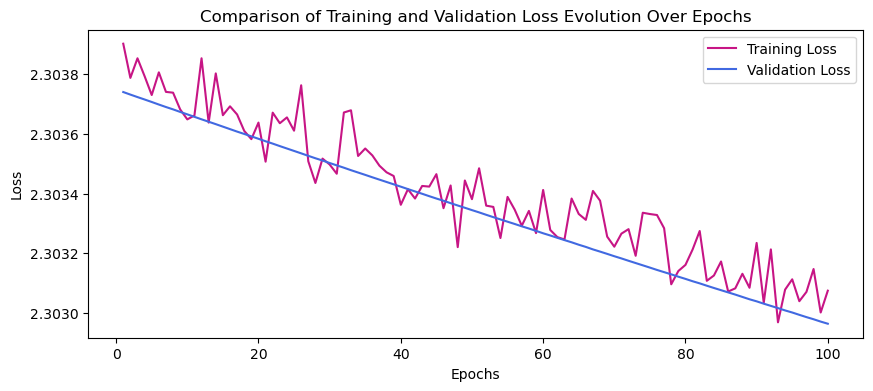

In [22]:
# num_epochs = 100, lr = 0.01, Three convolutional layers with Dropout, dropout = 0.3, l2 = 0, batch_size = len(train_subset): 
model_bgd_drop2 = CNNNetworkWithDropout(0.3)
loss_train, loss_val_list = model_gd(100, 0.01, model_bgd_drop2, 0, len(train_subset))
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.30405, Acc: 9.89% | Validation Loss: 2.30360, Validation Acc: 10.44%
Epoch: 5 | Loss: 2.30358, Acc: 9.89% | Validation Loss: 2.30327, Validation Acc: 10.44%
Epoch: 10 | Loss: 2.30324, Acc: 9.89% | Validation Loss: 2.30295, Validation Acc: 10.44%
Epoch: 15 | Loss: 2.30299, Acc: 9.89% | Validation Loss: 2.30266, Validation Acc: 10.44%
Epoch: 20 | Loss: 2.30264, Acc: 9.89% | Validation Loss: 2.30238, Validation Acc: 10.44%
Epoch: 25 | Loss: 2.30247, Acc: 9.89% | Validation Loss: 2.30211, Validation Acc: 10.44%
Epoch: 30 | Loss: 2.30213, Acc: 9.92% | Validation Loss: 2.30184, Validation Acc: 10.44%
Epoch: 35 | Loss: 2.30183, Acc: 10.04% | Validation Loss: 2.30157, Validation Acc: 10.55%
Epoch: 40 | Loss: 2.30160, Acc: 10.47% | Validation Loss: 2.30130, Validation Acc: 10.84%
Epoch: 45 | Loss: 2.30140, Acc: 11.14% | Validation Loss: 2.30101, Validation Acc: 11.45%
Epoch: 50 | Loss: 2.30107, Acc: 11.81% | Validation Loss: 2.30071, Validation Acc: 12.42%
Epoch: 55 | Loss: 2

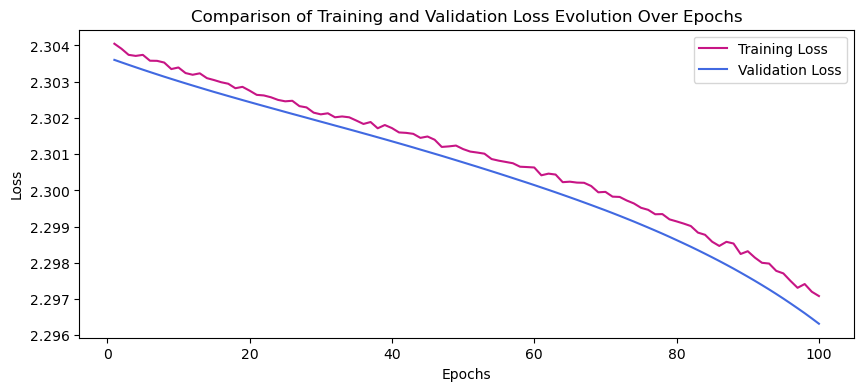

In [23]:
# num_epochs = 100, lr = 0.1, Three convolutional layers with Dropout, dropout = 0.2, l2 = 0, batch_size = len(train_subset):  
model_bgd_drop3 = CNNNetworkWithDropout(0.2)
loss_train, loss_val_list = model_gd(100, 0.1, model_bgd_drop3, 0, len(train_subset))
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.30323, Acc: 10.13% | Validation Loss: 2.30394, Validation Acc: 9.46%
Epoch: 5 | Loss: 2.30312, Acc: 10.13% | Validation Loss: 2.30370, Validation Acc: 9.46%
Epoch: 10 | Loss: 2.30276, Acc: 10.13% | Validation Loss: 2.30349, Validation Acc: 9.46%
Epoch: 15 | Loss: 2.30275, Acc: 10.13% | Validation Loss: 2.30329, Validation Acc: 9.46%
Epoch: 20 | Loss: 2.30260, Acc: 10.13% | Validation Loss: 2.30309, Validation Acc: 9.46%
Epoch: 25 | Loss: 2.30247, Acc: 10.13% | Validation Loss: 2.30291, Validation Acc: 9.46%
Epoch: 30 | Loss: 2.30236, Acc: 10.13% | Validation Loss: 2.30274, Validation Acc: 9.46%
Epoch: 35 | Loss: 2.30223, Acc: 10.13% | Validation Loss: 2.30257, Validation Acc: 9.46%
Epoch: 40 | Loss: 2.30206, Acc: 10.13% | Validation Loss: 2.30240, Validation Acc: 9.46%
Epoch: 45 | Loss: 2.30180, Acc: 10.13% | Validation Loss: 2.30224, Validation Acc: 9.46%
Epoch: 50 | Loss: 2.30181, Acc: 10.13% | Validation Loss: 2.30208, Validation Acc: 9.46%
Epoch: 55 | Loss: 2.301

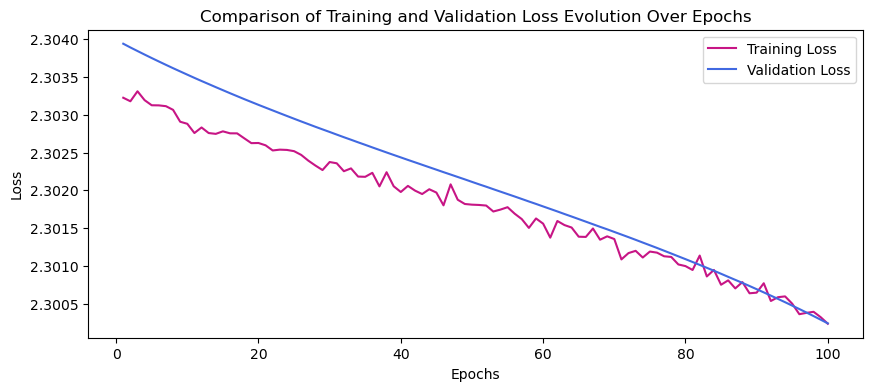

In [24]:
# num_epochs = 100, lr = 0.1, Three convolutional layers with Dropout, dropout = 0.3, l2 = 0, batch_size = len(train_subset):  
model_bgd_drop4 = CNNNetworkWithDropout(0.3)
loss_train, loss_val_list = model_gd(100, 0.1, model_bgd_drop4, 0, len(train_subset))
visualize_loss(loss_train, loss_val_list)

### model_bgd_l2:

Epoch: 0 | Loss: 2.30433, Acc: 9.89% | Validation Loss: 2.30342, Validation Acc: 10.44%
Epoch: 5 | Loss: 2.30429, Acc: 9.89% | Validation Loss: 2.30339, Validation Acc: 10.44%
Epoch: 10 | Loss: 2.30426, Acc: 9.89% | Validation Loss: 2.30336, Validation Acc: 10.44%
Epoch: 15 | Loss: 2.30422, Acc: 9.89% | Validation Loss: 2.30333, Validation Acc: 10.44%
Epoch: 20 | Loss: 2.30418, Acc: 9.89% | Validation Loss: 2.30330, Validation Acc: 10.44%
Epoch: 25 | Loss: 2.30414, Acc: 9.89% | Validation Loss: 2.30327, Validation Acc: 10.44%
Epoch: 30 | Loss: 2.30411, Acc: 9.89% | Validation Loss: 2.30324, Validation Acc: 10.44%
Epoch: 35 | Loss: 2.30407, Acc: 9.89% | Validation Loss: 2.30321, Validation Acc: 10.44%
Epoch: 40 | Loss: 2.30403, Acc: 9.89% | Validation Loss: 2.30319, Validation Acc: 10.44%
Epoch: 45 | Loss: 2.30400, Acc: 9.89% | Validation Loss: 2.30316, Validation Acc: 10.44%
Epoch: 50 | Loss: 2.30396, Acc: 9.89% | Validation Loss: 2.30313, Validation Acc: 10.44%
Epoch: 55 | Loss: 2.303

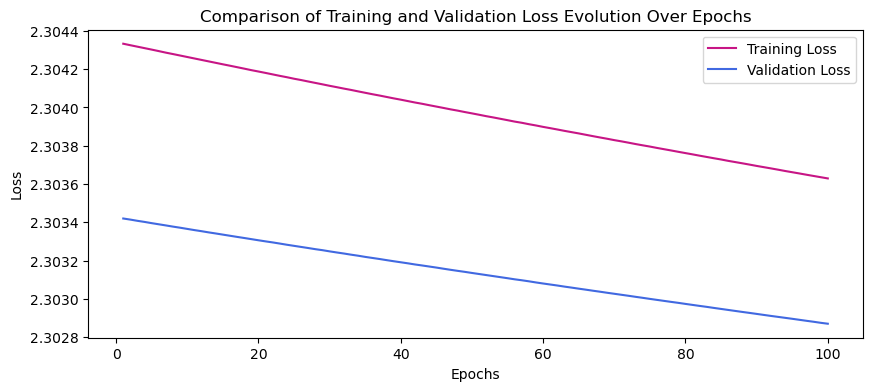

In [25]:
# num_epochs = 100, lr = 0.01, Three convolutional layers, l2 = 0.001, batch_size = len(train_subset):  
model_bgd5 = CNNNetwork2()
loss_train, loss_val_list = model_gd(100, 0.01, model_bgd5, 0.001, len(train_subset))
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.30369, Acc: 9.96% | Validation Loss: 2.30396, Validation Acc: 10.17%
Epoch: 5 | Loss: 2.30364, Acc: 9.96% | Validation Loss: 2.30391, Validation Acc: 10.17%
Epoch: 10 | Loss: 2.30359, Acc: 9.96% | Validation Loss: 2.30386, Validation Acc: 10.17%
Epoch: 15 | Loss: 2.30354, Acc: 9.96% | Validation Loss: 2.30380, Validation Acc: 10.17%
Epoch: 20 | Loss: 2.30349, Acc: 9.96% | Validation Loss: 2.30376, Validation Acc: 10.17%
Epoch: 25 | Loss: 2.30344, Acc: 9.96% | Validation Loss: 2.30371, Validation Acc: 10.17%
Epoch: 30 | Loss: 2.30339, Acc: 9.96% | Validation Loss: 2.30366, Validation Acc: 10.17%
Epoch: 35 | Loss: 2.30335, Acc: 9.96% | Validation Loss: 2.30361, Validation Acc: 10.17%
Epoch: 40 | Loss: 2.30330, Acc: 9.96% | Validation Loss: 2.30356, Validation Acc: 10.17%
Epoch: 45 | Loss: 2.30325, Acc: 9.96% | Validation Loss: 2.30352, Validation Acc: 10.17%
Epoch: 50 | Loss: 2.30321, Acc: 9.96% | Validation Loss: 2.30347, Validation Acc: 10.17%
Epoch: 55 | Loss: 2.303

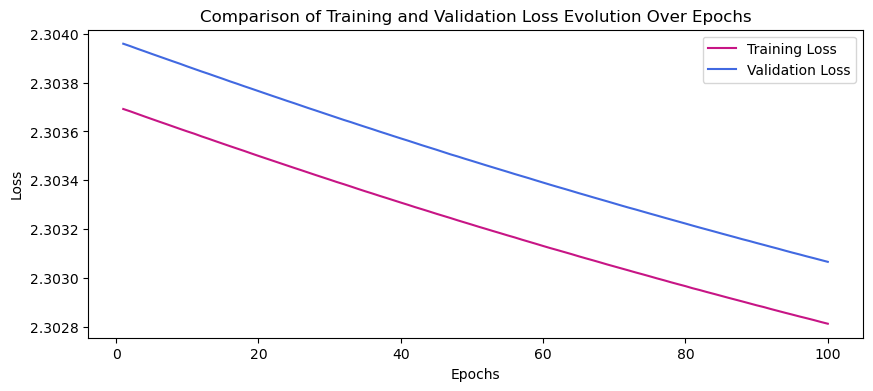

In [26]:
# num_epochs = 100, lr = 0.01, Three convolutional layers, l2 = 0.01, batch_size = len(train_subset): 
model_bgd6 = CNNNetwork2()
loss_train, loss_val_list = model_gd(100, 0.01, model_bgd6, 0.01, len(train_subset))
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.30353, Acc: 10.14% | Validation Loss: 2.30405, Validation Acc: 9.47%
Epoch: 5 | Loss: 2.30349, Acc: 10.14% | Validation Loss: 2.30400, Validation Acc: 9.47%
Epoch: 10 | Loss: 2.30346, Acc: 10.13% | Validation Loss: 2.30396, Validation Acc: 9.47%
Epoch: 15 | Loss: 2.30343, Acc: 10.13% | Validation Loss: 2.30393, Validation Acc: 9.46%
Epoch: 20 | Loss: 2.30339, Acc: 10.13% | Validation Loss: 2.30389, Validation Acc: 9.46%
Epoch: 25 | Loss: 2.30336, Acc: 10.13% | Validation Loss: 2.30385, Validation Acc: 9.46%
Epoch: 30 | Loss: 2.30334, Acc: 10.13% | Validation Loss: 2.30382, Validation Acc: 9.46%
Epoch: 35 | Loss: 2.30331, Acc: 10.13% | Validation Loss: 2.30378, Validation Acc: 9.46%
Epoch: 40 | Loss: 2.30328, Acc: 10.13% | Validation Loss: 2.30375, Validation Acc: 9.46%
Epoch: 45 | Loss: 2.30326, Acc: 10.13% | Validation Loss: 2.30372, Validation Acc: 9.46%
Epoch: 50 | Loss: 2.30323, Acc: 10.13% | Validation Loss: 2.30369, Validation Acc: 9.46%
Epoch: 55 | Loss: 2.303

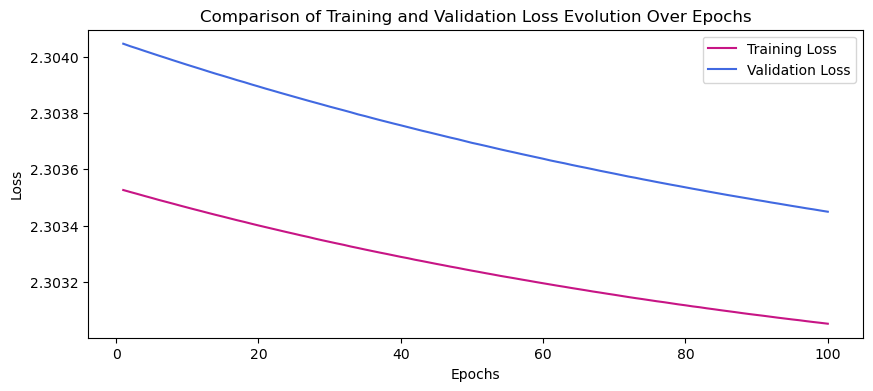

In [27]:
# num_epochs = 100, lr = 0.01, Three convolutional layers, l2 = 0.1, batch_size = len(train_subset): 
model_bgd7 = CNNNetwork2()
loss_train, loss_val_list = model_gd(100, 0.01, model_bgd7, 0.1, len(train_subset))
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.30336, Acc: 9.97% | Validation Loss: 2.30287, Validation Acc: 10.13%
Epoch: 5 | Loss: 2.30339, Acc: 9.97% | Validation Loss: 2.30285, Validation Acc: 10.13%
Epoch: 10 | Loss: 2.30331, Acc: 9.97% | Validation Loss: 2.30282, Validation Acc: 10.13%
Epoch: 15 | Loss: 2.30339, Acc: 9.97% | Validation Loss: 2.30280, Validation Acc: 10.13%
Epoch: 20 | Loss: 2.30336, Acc: 9.97% | Validation Loss: 2.30278, Validation Acc: 10.13%
Epoch: 25 | Loss: 2.30329, Acc: 9.97% | Validation Loss: 2.30276, Validation Acc: 10.13%
Epoch: 30 | Loss: 2.30327, Acc: 9.97% | Validation Loss: 2.30274, Validation Acc: 10.13%
Epoch: 35 | Loss: 2.30329, Acc: 9.97% | Validation Loss: 2.30272, Validation Acc: 10.13%
Epoch: 40 | Loss: 2.30325, Acc: 9.97% | Validation Loss: 2.30269, Validation Acc: 10.13%
Epoch: 45 | Loss: 2.30312, Acc: 9.97% | Validation Loss: 2.30267, Validation Acc: 10.13%
Epoch: 50 | Loss: 2.30312, Acc: 9.97% | Validation Loss: 2.30265, Validation Acc: 10.13%
Epoch: 55 | Loss: 2.303

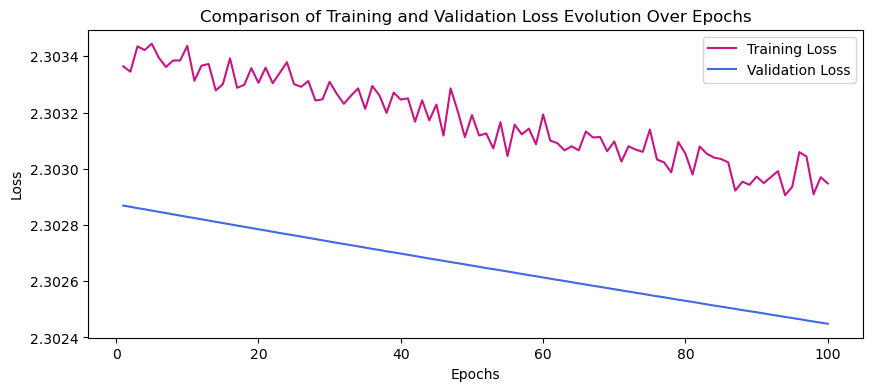

In [28]:
# num_epochs = 100, lr = 0.01, Three convolutional layers with Dropout,dropout = 0.2, l2 = 0.001,batch_size = len(train_subset):  
model_bgd_drop12 = CNNNetworkWithDropout(0.2)
loss_train, loss_val_list = model_gd(100, 0.01, model_bgd_drop12, 0.001, len(train_subset))
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.30282, Acc: 10.13% | Validation Loss: 2.30213, Validation Acc: 10.39%
Epoch: 5 | Loss: 2.30251, Acc: 10.15% | Validation Loss: 2.30189, Validation Acc: 10.44%
Epoch: 10 | Loss: 2.30221, Acc: 10.20% | Validation Loss: 2.30165, Validation Acc: 10.51%
Epoch: 15 | Loss: 2.30193, Acc: 10.23% | Validation Loss: 2.30143, Validation Acc: 10.54%
Epoch: 20 | Loss: 2.30166, Acc: 10.33% | Validation Loss: 2.30121, Validation Acc: 10.61%
Epoch: 25 | Loss: 2.30140, Acc: 10.42% | Validation Loss: 2.30100, Validation Acc: 10.69%
Epoch: 30 | Loss: 2.30114, Acc: 10.54% | Validation Loss: 2.30078, Validation Acc: 10.77%
Epoch: 35 | Loss: 2.30087, Acc: 10.66% | Validation Loss: 2.30056, Validation Acc: 10.88%
Epoch: 40 | Loss: 2.30060, Acc: 10.76% | Validation Loss: 2.30033, Validation Acc: 10.98%
Epoch: 45 | Loss: 2.30033, Acc: 10.86% | Validation Loss: 2.30009, Validation Acc: 11.18%
Epoch: 50 | Loss: 2.30004, Acc: 10.96% | Validation Loss: 2.29984, Validation Acc: 11.30%
Epoch: 55 | 

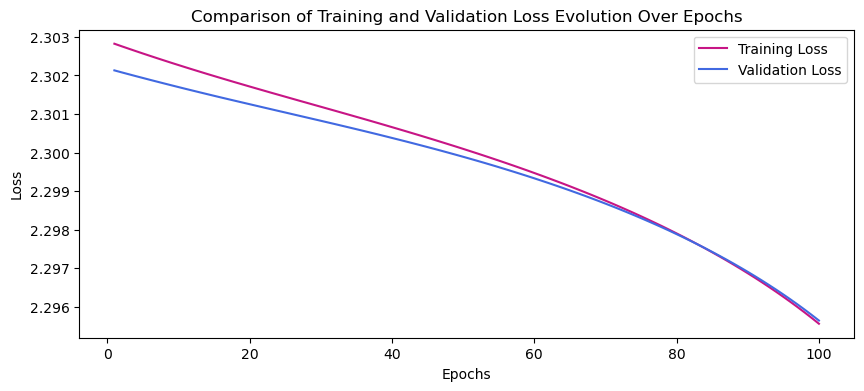

In [29]:
# num_epochs = 100, lr = 0.1, Three convolutional layers, l2 = 0.001, batch_size = len(train_subset): 
model_bgd8 = CNNNetwork2()
loss_train, loss_val_list = model_gd(100, 0.1, model_bgd8, 0.001, len(train_subset))
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.30357, Acc: 6.34% | Validation Loss: 2.30377, Validation Acc: 5.99%
Epoch: 5 | Loss: 2.30271, Acc: 9.72% | Validation Loss: 2.30295, Validation Acc: 9.15%
Epoch: 10 | Loss: 2.30197, Acc: 10.07% | Validation Loss: 2.30225, Validation Acc: 9.70%
Epoch: 15 | Loss: 2.30130, Acc: 10.10% | Validation Loss: 2.30160, Validation Acc: 9.73%
Epoch: 20 | Loss: 2.30069, Acc: 10.13% | Validation Loss: 2.30100, Validation Acc: 9.79%
Epoch: 25 | Loss: 2.30013, Acc: 10.21% | Validation Loss: 2.30044, Validation Acc: 9.90%
Epoch: 30 | Loss: 2.29959, Acc: 10.42% | Validation Loss: 2.29989, Validation Acc: 10.09%
Epoch: 35 | Loss: 2.29903, Acc: 10.64% | Validation Loss: 2.29933, Validation Acc: 10.33%
Epoch: 40 | Loss: 2.29843, Acc: 11.05% | Validation Loss: 2.29871, Validation Acc: 10.77%
Epoch: 45 | Loss: 2.29777, Acc: 11.80% | Validation Loss: 2.29802, Validation Acc: 11.44%
Epoch: 50 | Loss: 2.29702, Acc: 12.80% | Validation Loss: 2.29726, Validation Acc: 12.50%
Epoch: 55 | Loss: 2.

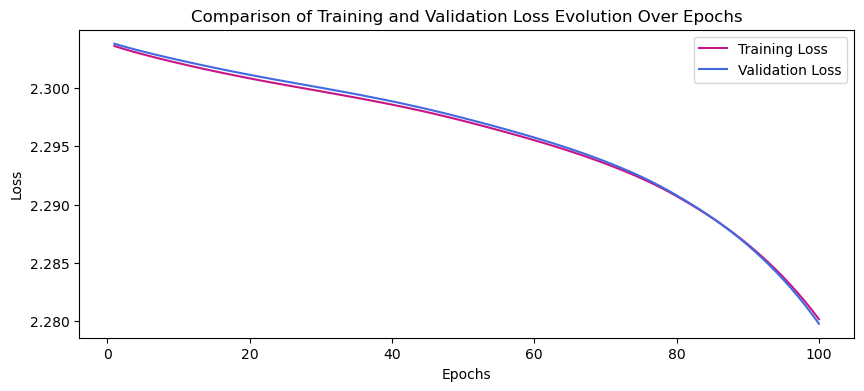

In [30]:
# num_epochs = 100, lr = 0.1, Three convolutional layers, l2 = 0.01, batch_size = len(train_subset): 
model_bgd9 = CNNNetwork2()
loss_train, loss_val_list = model_gd(100, 0.1, model_bgd9, 0.01, len(train_subset))
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.30455, Acc: 9.98% | Validation Loss: 2.30375, Validation Acc: 10.09%
Epoch: 5 | Loss: 2.30394, Acc: 9.98% | Validation Loss: 2.30329, Validation Acc: 10.09%
Epoch: 10 | Loss: 2.30354, Acc: 9.98% | Validation Loss: 2.30302, Validation Acc: 10.09%
Epoch: 15 | Loss: 2.30328, Acc: 9.98% | Validation Loss: 2.30285, Validation Acc: 10.09%
Epoch: 20 | Loss: 2.30311, Acc: 9.98% | Validation Loss: 2.30275, Validation Acc: 10.09%
Epoch: 25 | Loss: 2.30299, Acc: 9.98% | Validation Loss: 2.30269, Validation Acc: 10.09%
Epoch: 30 | Loss: 2.30291, Acc: 9.98% | Validation Loss: 2.30266, Validation Acc: 10.09%
Epoch: 35 | Loss: 2.30285, Acc: 9.98% | Validation Loss: 2.30263, Validation Acc: 10.09%
Epoch: 40 | Loss: 2.30280, Acc: 9.98% | Validation Loss: 2.30262, Validation Acc: 10.09%
Epoch: 45 | Loss: 2.30276, Acc: 9.98% | Validation Loss: 2.30261, Validation Acc: 10.09%
Epoch: 50 | Loss: 2.30273, Acc: 9.98% | Validation Loss: 2.30260, Validation Acc: 10.09%
Epoch: 55 | Loss: 2.302

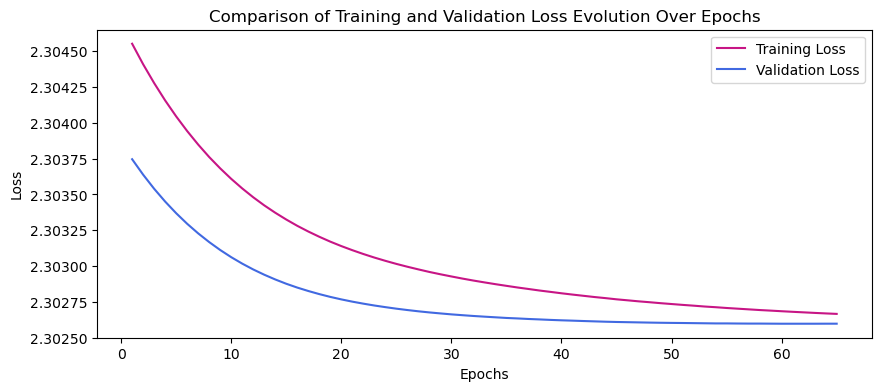

In [31]:
# num_epochs = 100, lr = 0.1, Three convolutional layers, l2 = 0.1, batch_size = len(train_subset): 
model_bgd10 = CNNNetwork2()
loss_train, loss_val_list = model_gd(100, 0.1, model_bgd10, 0.1, len(train_subset))
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.30410, Acc: 11.90% | Validation Loss: 2.30302, Validation Acc: 12.05%
Epoch: 5 | Loss: 2.30382, Acc: 12.10% | Validation Loss: 2.30280, Validation Acc: 12.17%
Epoch: 10 | Loss: 2.30352, Acc: 12.22% | Validation Loss: 2.30261, Validation Acc: 12.32%
Epoch: 15 | Loss: 2.30328, Acc: 12.34% | Validation Loss: 2.30244, Validation Acc: 12.44%
Epoch: 20 | Loss: 2.30308, Acc: 12.47% | Validation Loss: 2.30229, Validation Acc: 12.47%
Epoch: 25 | Loss: 2.30289, Acc: 12.61% | Validation Loss: 2.30216, Validation Acc: 12.57%
Epoch: 30 | Loss: 2.30267, Acc: 12.73% | Validation Loss: 2.30204, Validation Acc: 12.77%
Epoch: 35 | Loss: 2.30250, Acc: 12.89% | Validation Loss: 2.30193, Validation Acc: 12.92%
Epoch: 40 | Loss: 2.30230, Acc: 13.02% | Validation Loss: 2.30183, Validation Acc: 13.04%
Epoch: 45 | Loss: 2.30224, Acc: 13.12% | Validation Loss: 2.30173, Validation Acc: 13.12%
Epoch: 50 | Loss: 2.30212, Acc: 13.21% | Validation Loss: 2.30165, Validation Acc: 13.26%
Epoch: 55 | 

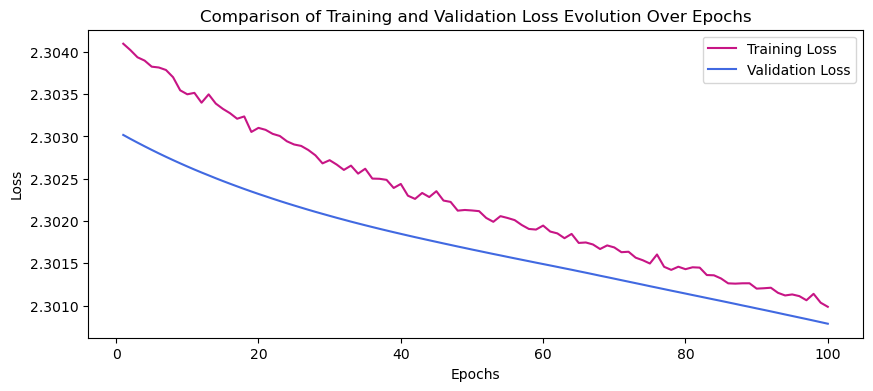

In [32]:
# num_epochs = 100, lr = 0.1, Three convolutional layers with Dropout,dropout = 0.2, l2 = 0.01,batch_size = len(train_subset): 
model_bgd_drop32 = CNNNetworkWithDropout(0.2)
loss_train, loss_val_list = model_gd(100, 0.1, model_bgd_drop32, 0.01, len(train_subset))
visualize_loss(loss_train, loss_val_list)

## MBGD - Mini Batch Gradient Descent:

### Utilizing varied hyperparameters for the model_mb:

Epoch: 0 | Loss: 2.31672, Acc: 9.38% | Validation Loss: 2.30468, Validation Acc: 10.13%
Epoch: 5 | Loss: 2.31348, Acc: 10.94% | Validation Loss: 2.30229, Validation Acc: 10.17%
Epoch: 10 | Loss: 2.31225, Acc: 23.44% | Validation Loss: 2.30122, Validation Acc: 15.74%
Epoch: 15 | Loss: 2.30954, Acc: 12.50% | Validation Loss: 2.29815, Validation Acc: 15.63%
Epoch: 20 | Loss: 2.29248, Acc: 28.12% | Validation Loss: 2.27613, Validation Acc: 19.21%
Epoch: 25 | Loss: 2.04238, Acc: 20.31% | Validation Loss: 2.01192, Validation Acc: 23.15%
Epoch: 30 | Loss: 1.84992, Acc: 28.12% | Validation Loss: 1.84358, Validation Acc: 31.96%
Epoch: 35 | Loss: 1.71063, Acc: 20.31% | Validation Loss: 1.69938, Validation Acc: 37.07%
Epoch: 40 | Loss: 1.61662, Acc: 37.50% | Validation Loss: 1.63201, Validation Acc: 39.83%
Epoch: 45 | Loss: 1.54803, Acc: 45.31% | Validation Loss: 1.56084, Validation Acc: 41.79%
Epoch: 49 | Loss: 1.50307, Acc: 45.31% | Validation Loss: 1.59535, Validation Acc: 42.23%


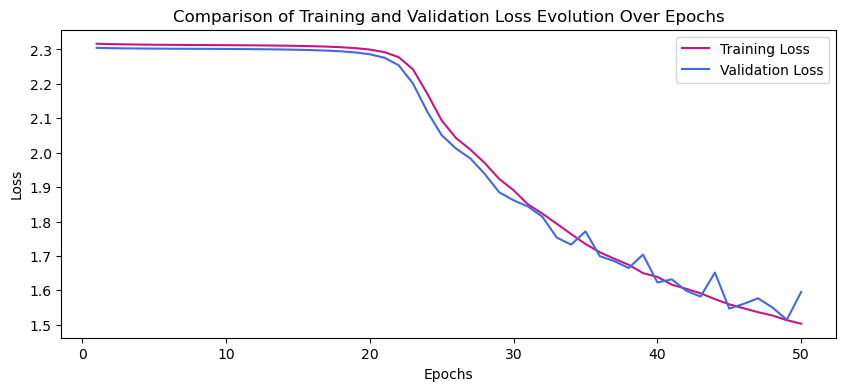

In [33]:
# num_epochs = 50, lr = 0.01, Two convolutional layers, l2 = 0, batch_size = 256:  
model_mb1 = CNNNetwork()
loss_train, loss_val_list = model_gd(50, 0.01, model_mb1, 0, 256)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.30867, Acc: 10.94% | Validation Loss: 2.30452, Validation Acc: 10.04%
Epoch: 5 | Loss: 2.27529, Acc: 17.19% | Validation Loss: 2.23738, Validation Acc: 16.52%
Epoch: 10 | Loss: 1.95083, Acc: 20.31% | Validation Loss: 1.92006, Validation Acc: 25.02%
Epoch: 15 | Loss: 1.68697, Acc: 32.81% | Validation Loss: 1.65614, Validation Acc: 38.62%
Epoch: 20 | Loss: 1.50456, Acc: 35.94% | Validation Loss: 1.55224, Validation Acc: 43.56%
Epoch: 25 | Loss: 1.39844, Acc: 43.75% | Validation Loss: 1.40058, Validation Acc: 49.95%
Epoch: 30 | Loss: 1.32456, Acc: 62.50% | Validation Loss: 1.37877, Validation Acc: 51.28%
Epoch: 35 | Loss: 1.26136, Acc: 64.06% | Validation Loss: 1.32994, Validation Acc: 52.02%
Epoch: 40 | Loss: 1.20172, Acc: 57.81% | Validation Loss: 1.24590, Validation Acc: 55.89%
Epoch: 45 | Loss: 1.14762, Acc: 57.81% | Validation Loss: 1.33569, Validation Acc: 52.94%
Epoch: 49 | Loss: 1.10888, Acc: 56.25% | Validation Loss: 1.19590, Validation Acc: 57.93%


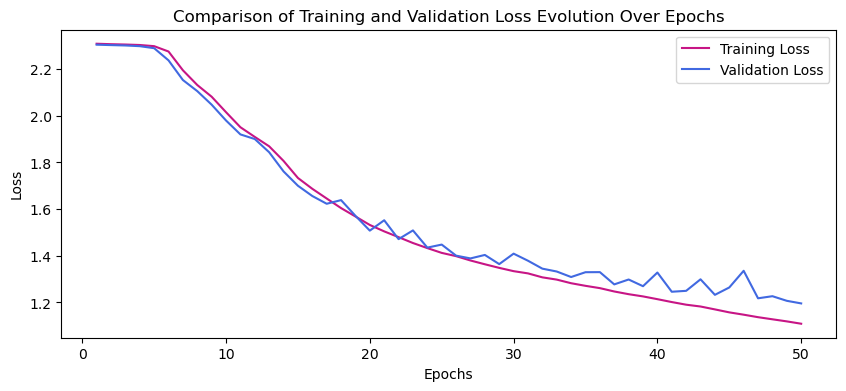

In [34]:
# num_epochs = 50, lr = 0.01, Two convolutional layers, l2 = 0, batch_size = 128:  
model_mb2 = CNNNetwork()
loss_train, loss_val_list = model_gd(50, 0.01, model_mb2, 0, 128)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.30497, Acc: 7.81% | Validation Loss: 2.30298, Validation Acc: 9.78%
Epoch: 5 | Loss: 1.89586, Acc: 34.38% | Validation Loss: 1.85892, Validation Acc: 30.40%
Epoch: 10 | Loss: 1.57764, Acc: 45.31% | Validation Loss: 1.55794, Validation Acc: 42.51%
Epoch: 15 | Loss: 1.38090, Acc: 60.94% | Validation Loss: 1.39683, Validation Acc: 48.94%
Epoch: 20 | Loss: 1.24794, Acc: 59.38% | Validation Loss: 1.28805, Validation Acc: 53.87%
Epoch: 25 | Loss: 1.14316, Acc: 54.69% | Validation Loss: 1.21141, Validation Acc: 57.37%
Epoch: 30 | Loss: 1.05643, Acc: 64.06% | Validation Loss: 1.17894, Validation Acc: 58.71%
Epoch: 35 | Loss: 0.98323, Acc: 78.12% | Validation Loss: 1.13694, Validation Acc: 60.67%
Epoch: 40 | Loss: 0.91265, Acc: 67.19% | Validation Loss: 1.13074, Validation Acc: 61.23%
Early stopping at epoch 43,with 1.10553 validation loss


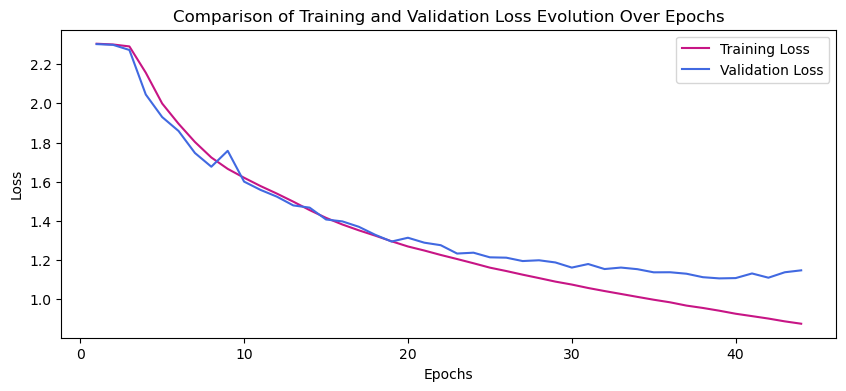

In [35]:
# num_epochs = 50, lr = 0.01, Two convolutional layers, l2 = 0, batch_size = 64:  
model_mb3 = CNNNetwork()
loss_train, loss_val_list = model_gd(50, 0.01, model_mb3, 0, 64)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.30188, Acc: 9.38% | Validation Loss: 2.29951, Validation Acc: 10.93%
Epoch: 5 | Loss: 1.55782, Acc: 34.38% | Validation Loss: 1.50026, Validation Acc: 45.24%
Epoch: 10 | Loss: 1.29406, Acc: 46.88% | Validation Loss: 1.30191, Validation Acc: 53.42%
Epoch: 15 | Loss: 1.12732, Acc: 65.62% | Validation Loss: 1.19212, Validation Acc: 58.12%
Epoch: 20 | Loss: 1.00187, Acc: 81.25% | Validation Loss: 1.13821, Validation Acc: 60.49%
Epoch: 25 | Loss: 0.90499, Acc: 68.75% | Validation Loss: 1.15619, Validation Acc: 60.74%
Epoch: 30 | Loss: 0.81741, Acc: 65.62% | Validation Loss: 1.12357, Validation Acc: 62.25%
Early stopping at epoch 32,with 1.10605 validation loss


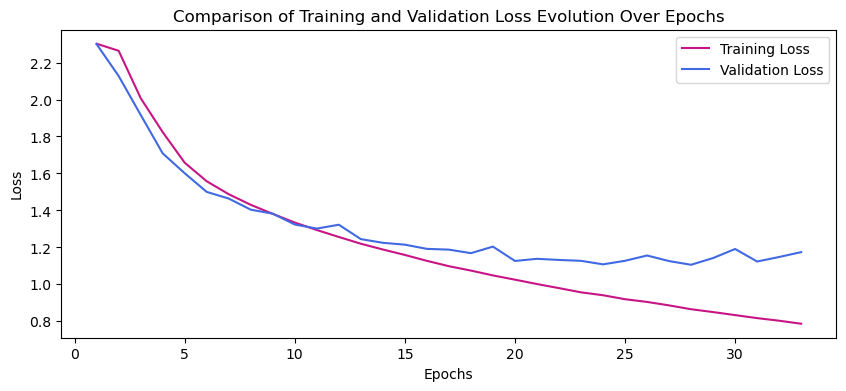

In [36]:
# num_epochs = 50, lr = 0.01, Two convolutional layers, l2 = 0, batch_size = 32:  
model_mb4 = CNNNetwork()
loss_train, loss_val_list = model_gd(50, 0.01, model_mb4, 0, 32)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.31334, Acc: 7.81% | Validation Loss: 2.29754, Validation Acc: 10.21%
Epoch: 5 | Loss: 1.56902, Acc: 31.25% | Validation Loss: 1.64613, Validation Acc: 39.60%
Epoch: 10 | Loss: 1.34353, Acc: 50.00% | Validation Loss: 1.53229, Validation Acc: 44.23%
Epoch: 15 | Loss: 1.18396, Acc: 51.56% | Validation Loss: 1.36435, Validation Acc: 50.97%
Epoch: 20 | Loss: 1.06853, Acc: 64.06% | Validation Loss: 1.30692, Validation Acc: 54.06%
Early stopping at epoch 21,with 1.28165 validation loss


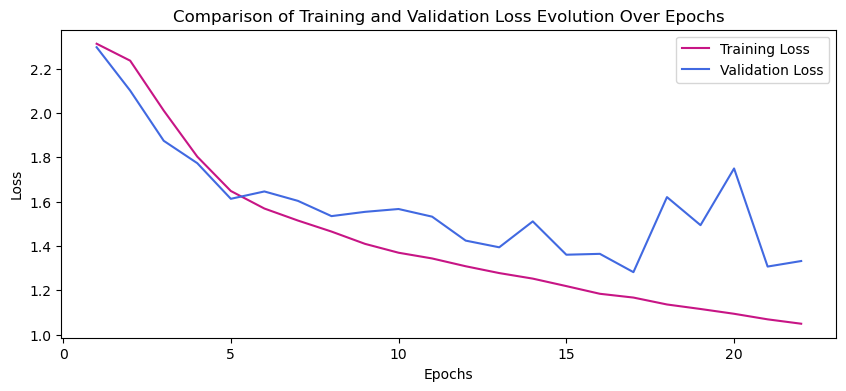

In [37]:
# num_epochs = 50, lr = 0.1, Two convolutional layers, l2 = 0, batch_size = 256:  
model_mb5 = CNNNetwork()
loss_train, loss_val_list = model_gd(50, 0.1, model_mb5, 0, 256)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.25266, Acc: 29.69% | Validation Loss: 2.10584, Validation Acc: 22.00%
Epoch: 5 | Loss: 1.35741, Acc: 46.88% | Validation Loss: 1.40571, Validation Acc: 49.61%
Epoch: 10 | Loss: 1.11306, Acc: 54.69% | Validation Loss: 1.42464, Validation Acc: 50.52%
Epoch: 15 | Loss: 0.94492, Acc: 75.00% | Validation Loss: 1.42133, Validation Acc: 54.43%
Early stopping at epoch 17,with 1.23060 validation loss


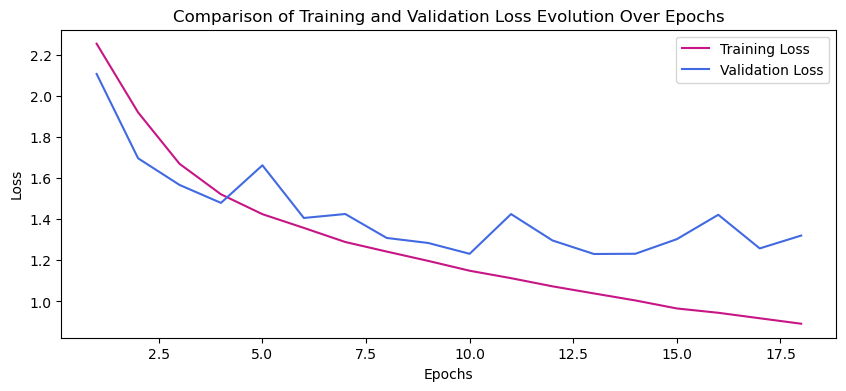

In [38]:
# num_epochs = 50, lr = 0.1, Two convolutional layers, l2 = 0, batch_size = 128:  
model_mb6 = CNNNetwork()
loss_train, loss_val_list = model_gd(50, 0.1, model_mb6, 0, 128)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.15003, Acc: 23.44% | Validation Loss: 1.83799, Validation Acc: 30.72%
Epoch: 5 | Loss: 1.24412, Acc: 64.06% | Validation Loss: 1.27061, Validation Acc: 55.32%
Epoch: 10 | Loss: 1.02053, Acc: 68.75% | Validation Loss: 1.25793, Validation Acc: 56.97%
Epoch: 15 | Loss: 0.88215, Acc: 71.88% | Validation Loss: 1.25588, Validation Acc: 57.91%
Early stopping at epoch 17,with 1.21404 validation loss


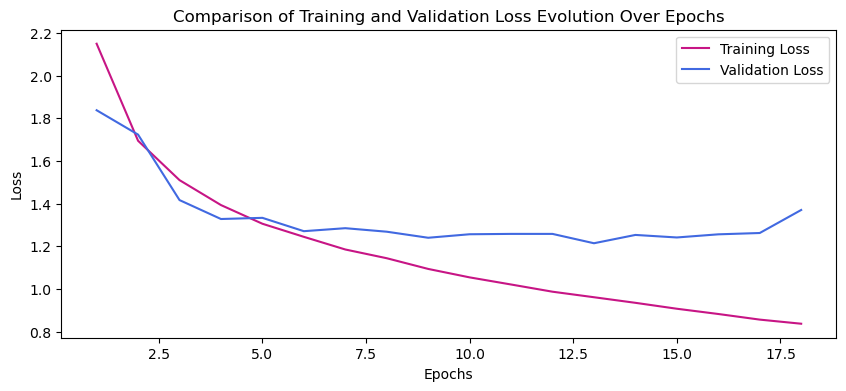

In [39]:
# num_epochs = 50, lr = 0.1, Two convolutional layers, l2 = 0, batch_size = 64:  
model_mb7 = CNNNetwork()
loss_train, loss_val_list = model_gd(50, 0.1, model_mb7, 0, 64)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 1.97011, Acc: 34.38% | Validation Loss: 1.64337, Validation Acc: 38.00%
Epoch: 5 | Loss: 1.18011, Acc: 62.50% | Validation Loss: 1.26145, Validation Acc: 55.48%
Epoch: 10 | Loss: 1.00194, Acc: 78.12% | Validation Loss: 1.30103, Validation Acc: 56.42%
Early stopping at epoch 13,with 1.20212 validation loss


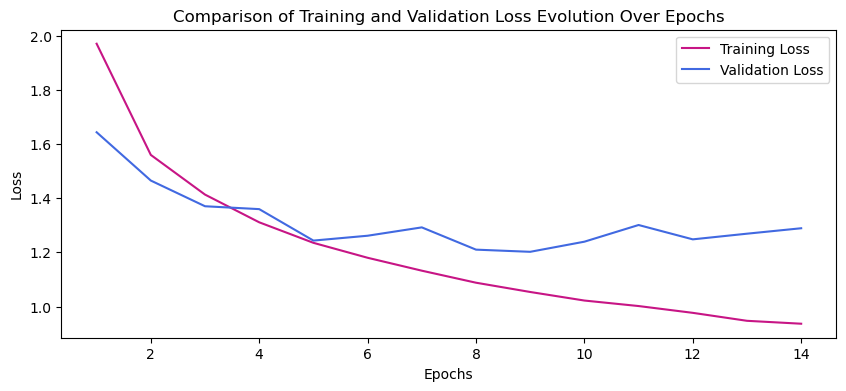

In [40]:
# num_epochs = 50, lr = 0.1, Two convolutional layers, l2 = 0, batch_size = 32:  
model_mb8 = CNNNetwork()
loss_train, loss_val_list = model_gd(50, 0.1, model_mb8, 0, 32)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.30626, Acc: 9.38% | Validation Loss: 2.30138, Validation Acc: 10.46%
Epoch: 5 | Loss: 2.02622, Acc: 31.25% | Validation Loss: 1.95507, Validation Acc: 28.22%
Epoch: 10 | Loss: 1.62362, Acc: 42.19% | Validation Loss: 1.73928, Validation Acc: 38.02%
Epoch: 15 | Loss: 1.42851, Acc: 59.38% | Validation Loss: 1.40779, Validation Acc: 49.64%
Epoch: 20 | Loss: 1.29867, Acc: 56.25% | Validation Loss: 1.31250, Validation Acc: 52.99%
Epoch: 25 | Loss: 1.18198, Acc: 59.38% | Validation Loss: 1.24490, Validation Acc: 56.63%
Epoch: 30 | Loss: 1.07376, Acc: 70.31% | Validation Loss: 1.14673, Validation Acc: 60.10%
Epoch: 35 | Loss: 0.97348, Acc: 73.44% | Validation Loss: 1.05182, Validation Acc: 63.53%
Epoch: 40 | Loss: 0.88206, Acc: 64.06% | Validation Loss: 1.04224, Validation Acc: 63.47%
Epoch: 45 | Loss: 0.79898, Acc: 71.88% | Validation Loss: 1.02735, Validation Acc: 64.72%
Epoch: 49 | Loss: 0.73108, Acc: 75.00% | Validation Loss: 1.01199, Validation Acc: 65.07%


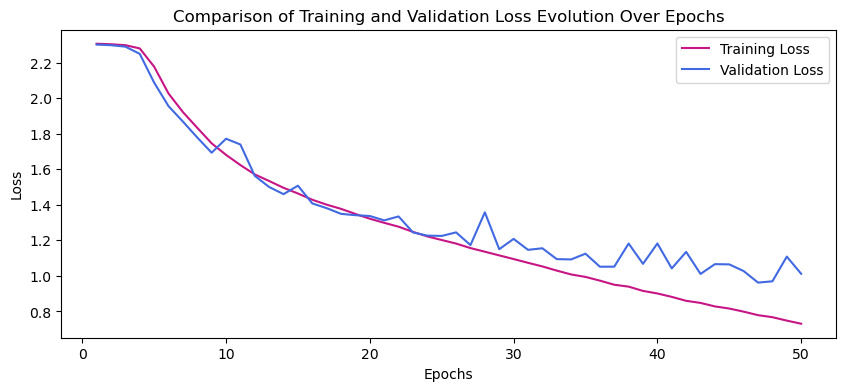

In [41]:
# num_epochs = 50, lr = 0.01, Three convolutional layers, l2 = 0, batch_size = 128:  
model_mb22 = CNNNetwork2()
loss_train, loss_val_list = model_gd(50, 0.01, model_mb22, 0, 128)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.30441, Acc: 25.00% | Validation Loss: 2.24338, Validation Acc: 15.34%
Epoch: 5 | Loss: 1.44085, Acc: 48.44% | Validation Loss: 1.46632, Validation Acc: 47.69%
Epoch: 10 | Loss: 1.06255, Acc: 51.56% | Validation Loss: 1.32878, Validation Acc: 53.59%
Epoch: 15 | Loss: 0.78635, Acc: 64.06% | Validation Loss: 1.06746, Validation Acc: 62.13%
Epoch: 19 | Loss: 0.59365, Acc: 71.88% | Validation Loss: 1.13794, Validation Acc: 62.97%


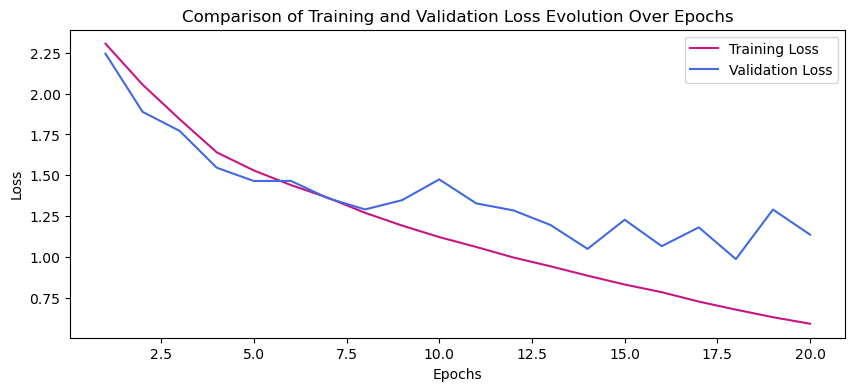

In [42]:
# num_epochs = 20, lr = 0.1, Three convolutional layers, l2 = 0, batch_size = 256:  
model_mb52 = CNNNetwork2()
loss_train, loss_val_list = model_gd(20, 0.1, model_mb52, 0, 256)
visualize_loss(loss_train, loss_val_list)

### model_mb_dropout:

Epoch: 0 | Loss: 2.30581, Acc: 10.94% | Validation Loss: 2.30005, Validation Acc: 14.85%
Epoch: 5 | Loss: 2.07909, Acc: 20.31% | Validation Loss: 2.01968, Validation Acc: 27.36%
Epoch: 10 | Loss: 1.74111, Acc: 42.19% | Validation Loss: 1.66439, Validation Acc: 39.85%
Epoch: 15 | Loss: 1.54005, Acc: 50.00% | Validation Loss: 1.48746, Validation Acc: 46.17%
Epoch: 20 | Loss: 1.41989, Acc: 54.69% | Validation Loss: 1.36777, Validation Acc: 50.40%
Epoch: 25 | Loss: 1.31808, Acc: 53.12% | Validation Loss: 1.29597, Validation Acc: 54.07%
Epoch: 30 | Loss: 1.22279, Acc: 59.38% | Validation Loss: 1.19139, Validation Acc: 58.27%
Epoch: 35 | Loss: 1.13613, Acc: 64.06% | Validation Loss: 1.13696, Validation Acc: 60.24%
Epoch: 40 | Loss: 1.05244, Acc: 57.81% | Validation Loss: 1.07437, Validation Acc: 62.36%
Epoch: 45 | Loss: 0.97483, Acc: 68.75% | Validation Loss: 0.99046, Validation Acc: 65.44%
Epoch: 49 | Loss: 0.91733, Acc: 82.81% | Validation Loss: 0.97097, Validation Acc: 66.15%


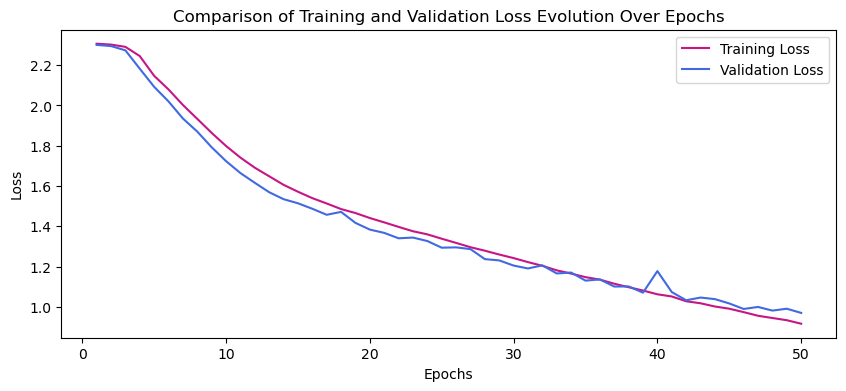

In [43]:
# num_epochs = 50, lr = 0.01, Three convolutional layers with Dropout, dropout = 0.1, l2 = 0, batch_size = 128: 
model_mb_drop1 = CNNNetworkWithDropout(0.1)
loss_train, loss_val_list = model_gd(50, 0.01, model_mb_drop1, 0, 128)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.30652, Acc: 7.81% | Validation Loss: 2.30149, Validation Acc: 10.51%
Epoch: 5 | Loss: 2.10717, Acc: 26.56% | Validation Loss: 2.02640, Validation Acc: 26.94%
Epoch: 10 | Loss: 1.73925, Acc: 39.06% | Validation Loss: 1.65035, Validation Acc: 39.40%
Epoch: 15 | Loss: 1.55421, Acc: 42.19% | Validation Loss: 1.48533, Validation Acc: 45.20%
Epoch: 20 | Loss: 1.43373, Acc: 50.00% | Validation Loss: 1.37922, Validation Acc: 50.77%
Epoch: 25 | Loss: 1.33955, Acc: 51.56% | Validation Loss: 1.28989, Validation Acc: 54.01%
Epoch: 30 | Loss: 1.25641, Acc: 62.50% | Validation Loss: 1.25018, Validation Acc: 55.72%
Epoch: 35 | Loss: 1.18653, Acc: 62.50% | Validation Loss: 1.15786, Validation Acc: 59.00%
Epoch: 40 | Loss: 1.11914, Acc: 60.94% | Validation Loss: 1.08747, Validation Acc: 61.41%
Epoch: 45 | Loss: 1.06038, Acc: 71.88% | Validation Loss: 1.03435, Validation Acc: 63.57%
Epoch: 49 | Loss: 1.01449, Acc: 71.88% | Validation Loss: 1.00959, Validation Acc: 64.11%


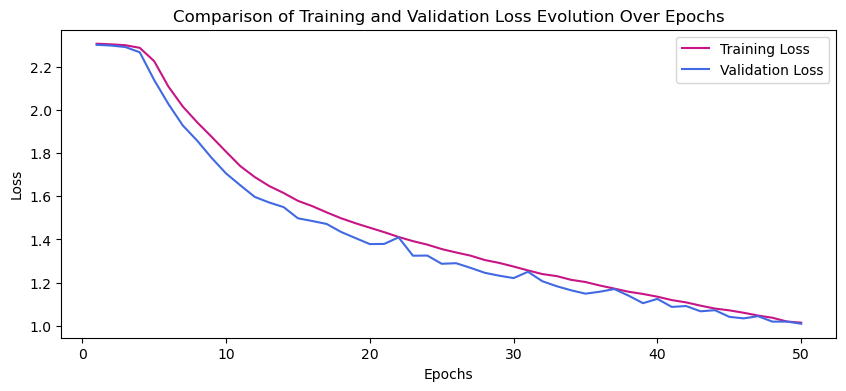

In [44]:
# num_epochs = 50, lr = 0.01, Three convolutional layers with Dropout, dropout = 0.2, l2 = 0, batch_size = 128:   
model_mb_drop2 = CNNNetworkWithDropout(0.2)
loss_train, loss_val_list = model_gd(50, 0.01, model_mb_drop2, 0, 128)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.30697, Acc: 6.25% | Validation Loss: 2.30237, Validation Acc: 10.02%
Epoch: 5 | Loss: 2.29929, Acc: 12.50% | Validation Loss: 2.29160, Validation Acc: 17.36%
Epoch: 10 | Loss: 2.09634, Acc: 20.31% | Validation Loss: 2.02530, Validation Acc: 27.82%
Epoch: 15 | Loss: 1.76255, Acc: 35.94% | Validation Loss: 1.66992, Validation Acc: 38.93%
Epoch: 20 | Loss: 1.59918, Acc: 50.00% | Validation Loss: 1.55766, Validation Acc: 43.22%
Epoch: 25 | Loss: 1.50303, Acc: 51.56% | Validation Loss: 1.41852, Validation Acc: 48.01%
Epoch: 30 | Loss: 1.41501, Acc: 59.38% | Validation Loss: 1.32816, Validation Acc: 51.75%
Epoch: 35 | Loss: 1.33823, Acc: 54.69% | Validation Loss: 1.28797, Validation Acc: 53.59%
Epoch: 40 | Loss: 1.27023, Acc: 59.38% | Validation Loss: 1.19479, Validation Acc: 57.52%
Epoch: 45 | Loss: 1.20096, Acc: 68.75% | Validation Loss: 1.13263, Validation Acc: 59.78%
Epoch: 49 | Loss: 1.15225, Acc: 62.50% | Validation Loss: 1.10046, Validation Acc: 61.28%


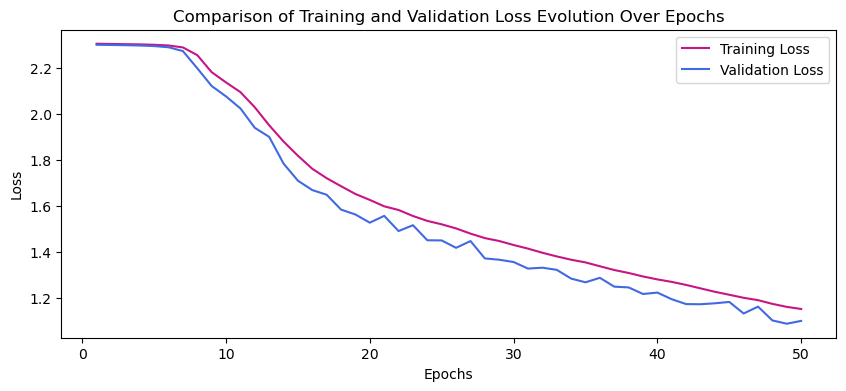

In [45]:
# num_epochs = 50, lr = 0.01, Three convolutional layers with Dropout, dropout = 0.3, l2 = 0, batch_size = 128:  
model_mb_drop3 = CNNNetworkWithDropout(0.3)
loss_train, loss_val_list = model_gd(50, 0.01, model_mb_drop3, 0, 128)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.31109, Acc: 25.00% | Validation Loss: 2.29054, Validation Acc: 21.07%
Epoch: 5 | Loss: 1.47655, Acc: 39.06% | Validation Loss: 2.32883, Validation Acc: 32.14%
Epoch: 10 | Loss: 1.13117, Acc: 54.69% | Validation Loss: 1.20574, Validation Acc: 57.03%
Epoch: 14 | Loss: 0.93287, Acc: 62.50% | Validation Loss: 1.10085, Validation Acc: 61.07%


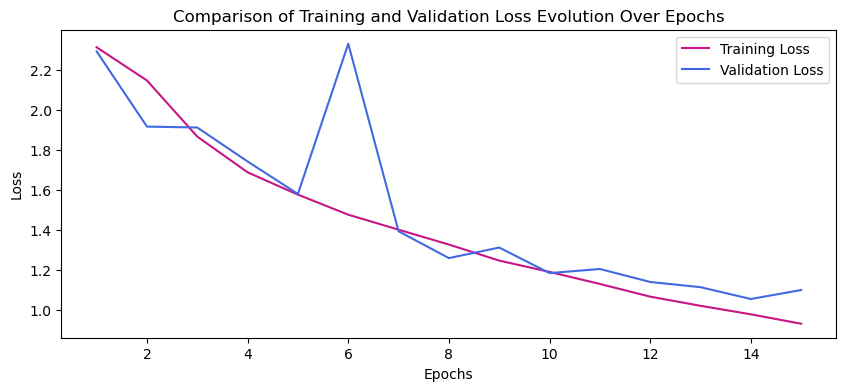

In [46]:
# num_epochs = 15, lr = 0.1, Three convolutional layers with Dropout, dropout = 0.1, l2 = 0, batch_size = 256: 
model_mb_drop4 = CNNNetworkWithDropout(0.1)
loss_train, loss_val_list = model_gd(15, 0.1, model_mb_drop4, 0, 256)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.03763, Acc: 35.94% | Validation Loss: 1.93856, Validation Acc: 31.93%
Epoch: 5 | Loss: 0.90352, Acc: 78.12% | Validation Loss: 0.93225, Validation Acc: 68.21%
Epoch: 10 | Loss: 0.56127, Acc: 90.62% | Validation Loss: 0.82981, Validation Acc: 72.03%
Epoch: 14 | Loss: 0.39137, Acc: 96.88% | Validation Loss: 0.86578, Validation Acc: 72.86%


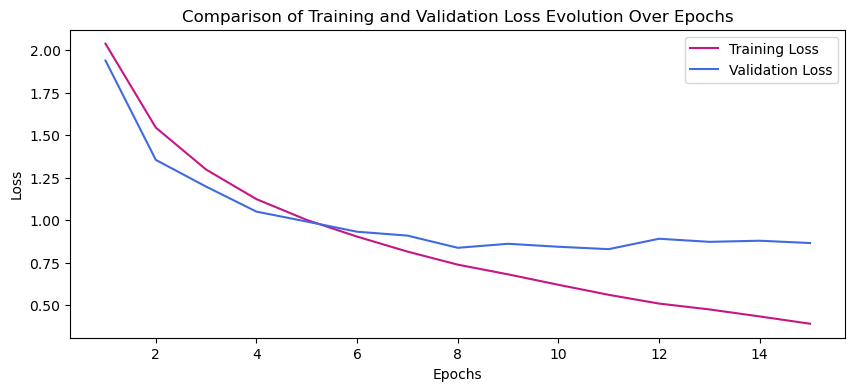

In [47]:
# num_epochs = 15, lr = 0.1, Three convolutional layers with Dropout, dropout = 0.1, l2 = 0, batch_size = 64:  
model_mb_drop4 = CNNNetworkWithDropout(0.1)
loss_train, loss_val_list = model_gd(15, 0.1, model_mb_drop4, 0, 64)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.06028, Acc: 34.38% | Validation Loss: 1.70368, Validation Acc: 38.87%
Epoch: 5 | Loss: 0.98764, Acc: 70.31% | Validation Loss: 0.96339, Validation Acc: 66.07%
Epoch: 10 | Loss: 0.69280, Acc: 79.69% | Validation Loss: 0.80161, Validation Acc: 72.40%
Epoch: 14 | Loss: 0.55795, Acc: 85.94% | Validation Loss: 0.78076, Validation Acc: 74.12%


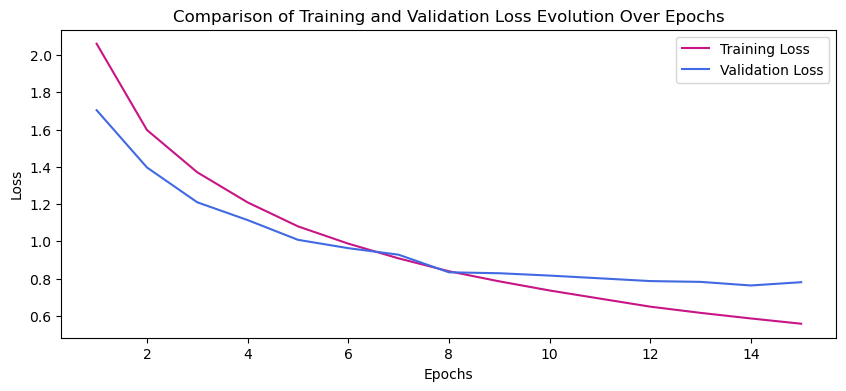

In [48]:
# num_epochs = 15, lr = 0.1, Three convolutional layers with Dropout, dropout = 0.2, l2 = 0, batch_size = 64:  
model_mb_drop5 = CNNNetworkWithDropout(0.2)
loss_train, loss_val_list = model_gd(15, 0.1, model_mb_drop5, 0, 64)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.08397, Acc: 40.62% | Validation Loss: 1.69476, Validation Acc: 36.64%
Epoch: 5 | Loss: 1.04640, Acc: 65.62% | Validation Loss: 0.99197, Validation Acc: 65.38%
Epoch: 10 | Loss: 0.79553, Acc: 82.81% | Validation Loss: 0.78290, Validation Acc: 72.71%
Epoch: 14 | Loss: 0.68285, Acc: 81.25% | Validation Loss: 0.74812, Validation Acc: 74.27%


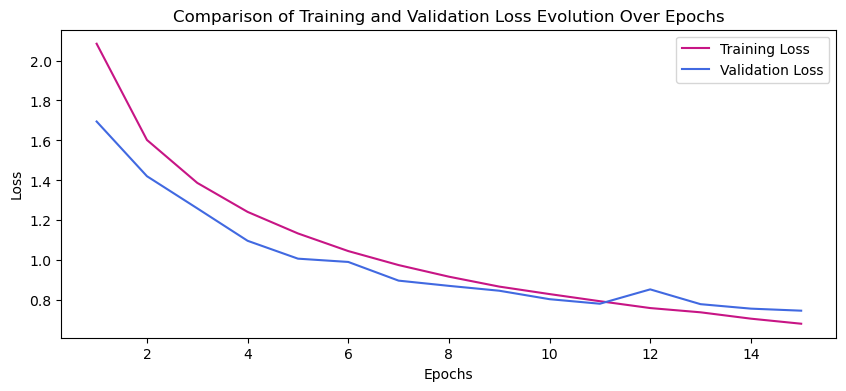

In [49]:
# num_epochs = 15, lr = 0.1, Three convolutional layers with Dropout, dropout = 0.3, l2 = 0, batch_size = 64:  
model_mb_drop6 = CNNNetworkWithDropout(0.3)
loss_train, loss_val_list = model_gd(15, 0.1, model_mb_drop6, 0, 64)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.31489, Acc: 9.38% | Validation Loss: 2.30314, Validation Acc: 10.17%
Epoch: 5 | Loss: 2.31439, Acc: 9.38% | Validation Loss: 2.30270, Validation Acc: 10.17%
Epoch: 10 | Loss: 2.31384, Acc: 14.06% | Validation Loss: 2.30229, Validation Acc: 10.21%
Epoch: 15 | Loss: 2.31353, Acc: 17.19% | Validation Loss: 2.30191, Validation Acc: 10.58%
Epoch: 20 | Loss: 2.31305, Acc: 15.62% | Validation Loss: 2.30155, Validation Acc: 12.61%
Epoch: 25 | Loss: 2.31268, Acc: 15.62% | Validation Loss: 2.30121, Validation Acc: 15.23%
Epoch: 30 | Loss: 2.31230, Acc: 9.38% | Validation Loss: 2.30088, Validation Acc: 16.49%
Epoch: 35 | Loss: 2.31196, Acc: 7.81% | Validation Loss: 2.30054, Validation Acc: 16.86%
Epoch: 40 | Loss: 2.31146, Acc: 14.06% | Validation Loss: 2.30017, Validation Acc: 16.49%
Epoch: 45 | Loss: 2.31111, Acc: 14.06% | Validation Loss: 2.29975, Validation Acc: 16.01%
Epoch: 49 | Loss: 2.31072, Acc: 14.06% | Validation Loss: 2.29937, Validation Acc: 15.83%


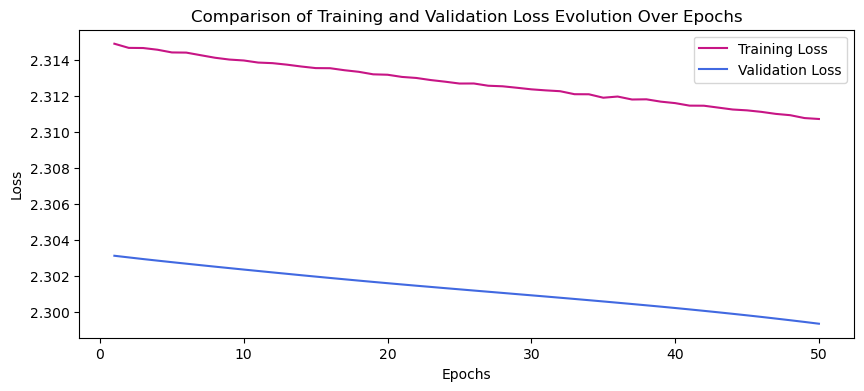

In [50]:
# num_epochs = 50, lr = 0.01, Three convolutional layers with Dropout, dropout = 0.1, l2 = 0, batch_size = 256:  
model_mb_drop7 = CNNNetworkWithDropout(0.1)
loss_train, loss_val_list = model_gd(50, 0.001, model_mb_drop7, 0, 256)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.30807, Acc: 7.81% | Validation Loss: 2.30379, Validation Acc: 11.29%
Epoch: 5 | Loss: 2.30625, Acc: 12.50% | Validation Loss: 2.30206, Validation Acc: 10.16%
Epoch: 10 | Loss: 2.30443, Acc: 10.94% | Validation Loss: 2.30025, Validation Acc: 9.94%
Epoch: 15 | Loss: 2.30209, Acc: 12.50% | Validation Loss: 2.29780, Validation Acc: 10.50%
Epoch: 20 | Loss: 2.29844, Acc: 7.81% | Validation Loss: 2.29383, Validation Acc: 11.88%
Epoch: 25 | Loss: 2.29178, Acc: 14.06% | Validation Loss: 2.28630, Validation Acc: 13.91%
Epoch: 30 | Loss: 2.27655, Acc: 15.62% | Validation Loss: 2.26907, Validation Acc: 15.89%
Epoch: 35 | Loss: 2.23734, Acc: 23.44% | Validation Loss: 2.22342, Validation Acc: 18.76%
Epoch: 40 | Loss: 2.16731, Acc: 14.06% | Validation Loss: 2.14582, Validation Acc: 22.57%
Epoch: 45 | Loss: 2.13206, Acc: 26.56% | Validation Loss: 2.11029, Validation Acc: 24.65%
Epoch: 49 | Loss: 2.11063, Acc: 29.69% | Validation Loss: 2.08673, Validation Acc: 25.34%


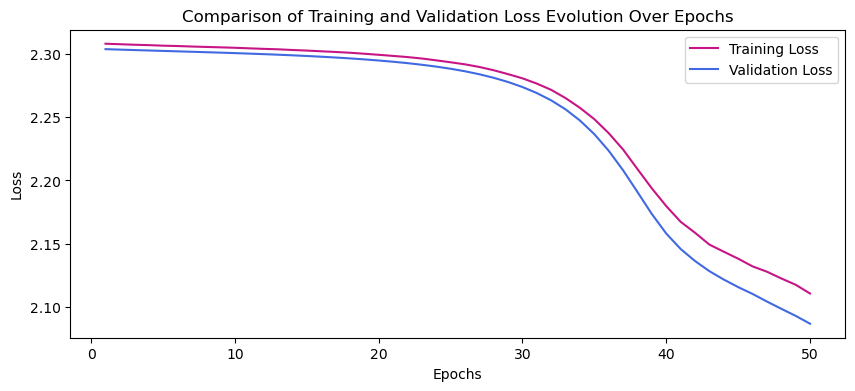

In [51]:
# num_epochs = 50, lr = 0.001, Three convolutional layers with Dropout, dropout = 0.1, l2 = 0, batch_size = 128:  
model_mb_drop8 = CNNNetworkWithDropout(0.1)
loss_train, loss_val_list = model_gd(50, 0.001, model_mb_drop8, 0, 128)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 1.91756, Acc: 46.88% | Validation Loss: 1.49019, Validation Acc: 45.09%
Epoch: 5 | Loss: 0.96425, Acc: 75.00% | Validation Loss: 0.88161, Validation Acc: 69.12%
Epoch: 10 | Loss: 0.80136, Acc: 93.75% | Validation Loss: 0.78916, Validation Acc: 72.73%
Epoch: 14 | Loss: 0.74278, Acc: 87.50% | Validation Loss: 0.77454, Validation Acc: 73.89%


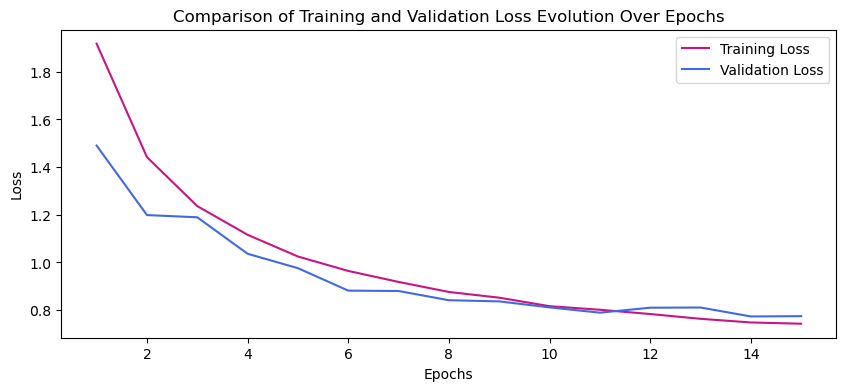

In [52]:
# num_epochs = 15, lr = 0.1, Three convolutional layers with Dropout, dropout = 0.3, l2 = 0, batch_size = 32:  
model_mb_drop6 = CNNNetworkWithDropout(0.3)
loss_train, loss_val_list = model_gd(15, 0.1, model_mb_drop6, 0, 32)
visualize_loss(loss_train, loss_val_list)

### model_mb_l2:

Epoch: 0 | Loss: 2.30655, Acc: 9.38% | Validation Loss: 2.30217, Validation Acc: 12.05%
Epoch: 5 | Loss: 2.16027, Acc: 26.56% | Validation Loss: 2.05907, Validation Acc: 25.56%
Epoch: 10 | Loss: 1.68575, Acc: 32.81% | Validation Loss: 1.73529, Validation Acc: 37.56%
Epoch: 15 | Loss: 1.46628, Acc: 39.06% | Validation Loss: 1.44804, Validation Acc: 47.38%
Epoch: 20 | Loss: 1.32757, Acc: 56.25% | Validation Loss: 1.32448, Validation Acc: 52.76%
Epoch: 25 | Loss: 1.21113, Acc: 65.62% | Validation Loss: 1.22860, Validation Acc: 56.77%
Epoch: 30 | Loss: 1.09930, Acc: 67.19% | Validation Loss: 1.13804, Validation Acc: 59.84%
Epoch: 35 | Loss: 1.00501, Acc: 76.56% | Validation Loss: 1.08510, Validation Acc: 62.58%
Epoch: 40 | Loss: 0.91845, Acc: 60.94% | Validation Loss: 1.04941, Validation Acc: 63.73%
Epoch: 45 | Loss: 0.84216, Acc: 68.75% | Validation Loss: 1.02415, Validation Acc: 64.56%
Epoch: 49 | Loss: 0.78644, Acc: 64.06% | Validation Loss: 1.15750, Validation Acc: 61.28%


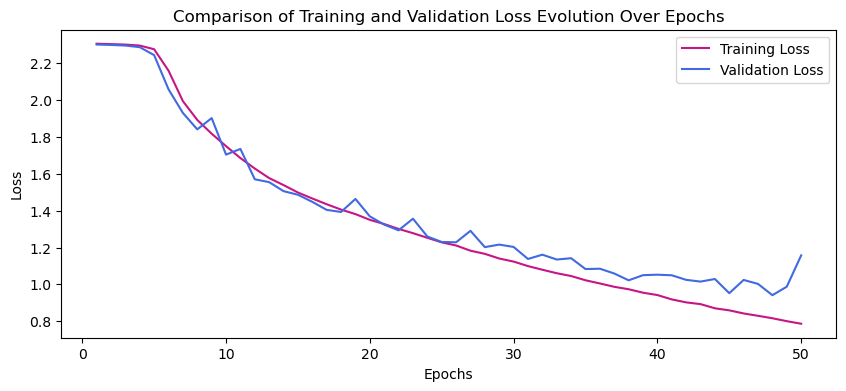

In [53]:
# num_epochs = 50, lr = 0.01, Three convolutional layers, l2 = 0.001, batch_size = 128:  
model_mb9 = CNNNetwork2()
loss_train, loss_val_list = model_gd(50, 0.01, model_mb9, 0.001, 128)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.30640, Acc: 4.69% | Validation Loss: 2.30196, Validation Acc: 10.02%
Epoch: 5 | Loss: 2.29665, Acc: 29.69% | Validation Loss: 2.28917, Validation Acc: 22.46%
Epoch: 10 | Loss: 2.00669, Acc: 32.81% | Validation Loss: 1.98528, Validation Acc: 26.77%
Epoch: 15 | Loss: 1.78745, Acc: 37.50% | Validation Loss: 1.74070, Validation Acc: 37.13%
Epoch: 20 | Loss: 1.59905, Acc: 35.94% | Validation Loss: 1.57853, Validation Acc: 42.29%
Epoch: 25 | Loss: 1.50311, Acc: 46.88% | Validation Loss: 1.48370, Validation Acc: 45.43%
Epoch: 30 | Loss: 1.43235, Acc: 48.44% | Validation Loss: 1.42522, Validation Acc: 47.72%
Epoch: 35 | Loss: 1.37857, Acc: 46.88% | Validation Loss: 1.40669, Validation Acc: 49.53%
Epoch: 40 | Loss: 1.32686, Acc: 51.56% | Validation Loss: 1.38446, Validation Acc: 49.91%
Epoch: 45 | Loss: 1.27416, Acc: 62.50% | Validation Loss: 1.34709, Validation Acc: 51.93%
Epoch: 49 | Loss: 1.23631, Acc: 59.38% | Validation Loss: 1.33647, Validation Acc: 51.89%


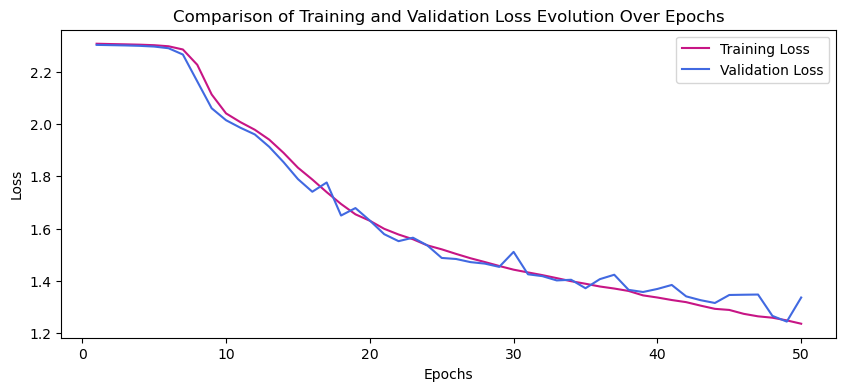

In [54]:
# num_epochs = 50, lr = 0.01, Three convolutional layers, l2 = 0.01, batch_size = 128:  
model_mb10 = CNNNetwork2()
loss_train, loss_val_list = model_gd(50, 0.01, model_mb10, 0.01, 128)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.30689, Acc: 12.50% | Validation Loss: 2.30285, Validation Acc: 9.46%
Epoch: 5 | Loss: 2.30629, Acc: 9.38% | Validation Loss: 2.30269, Validation Acc: 9.46%
Epoch: 10 | Loss: 2.30628, Acc: 12.50% | Validation Loss: 2.30267, Validation Acc: 9.46%
Early stopping at epoch 14,with 2.30267 validation loss


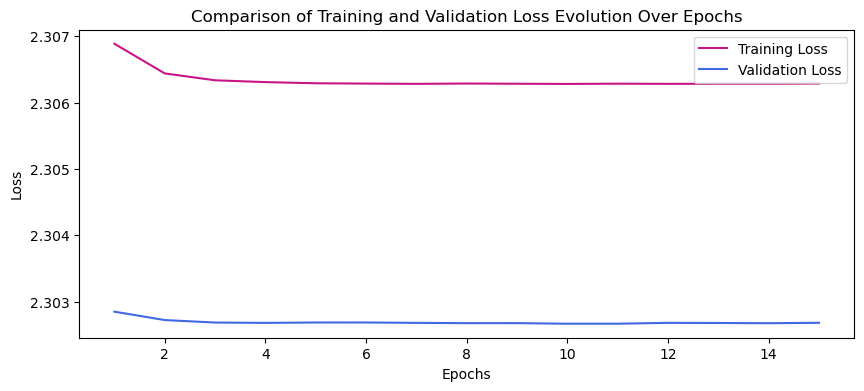

In [55]:
# num_epochs = 50, lr = 0.01, Three convolutional layers, l2 = 0.1, batch_size = 128: 
model_mb11 = CNNNetwork2()
loss_train, loss_val_list = model_gd(50, 0.01, model_mb11, 0.1, 128)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.30881, Acc: 3.12% | Validation Loss: 2.30454, Validation Acc: 10.20%
Epoch: 5 | Loss: 2.30511, Acc: 9.38% | Validation Loss: 2.30145, Validation Acc: 12.78%
Epoch: 10 | Loss: 2.29776, Acc: 14.06% | Validation Loss: 2.29172, Validation Acc: 17.34%
Epoch: 15 | Loss: 2.00295, Acc: 29.69% | Validation Loss: 1.95121, Validation Acc: 29.66%
Epoch: 20 | Loss: 1.66788, Acc: 31.25% | Validation Loss: 1.64397, Validation Acc: 38.97%
Epoch: 25 | Loss: 1.51740, Acc: 43.75% | Validation Loss: 1.50686, Validation Acc: 44.54%
Epoch: 30 | Loss: 1.42352, Acc: 53.12% | Validation Loss: 1.41770, Validation Acc: 48.16%
Epoch: 35 | Loss: 1.34242, Acc: 56.25% | Validation Loss: 1.40044, Validation Acc: 48.97%
Epoch: 39 | Loss: 1.28587, Acc: 60.94% | Validation Loss: 1.42729, Validation Acc: 50.05%


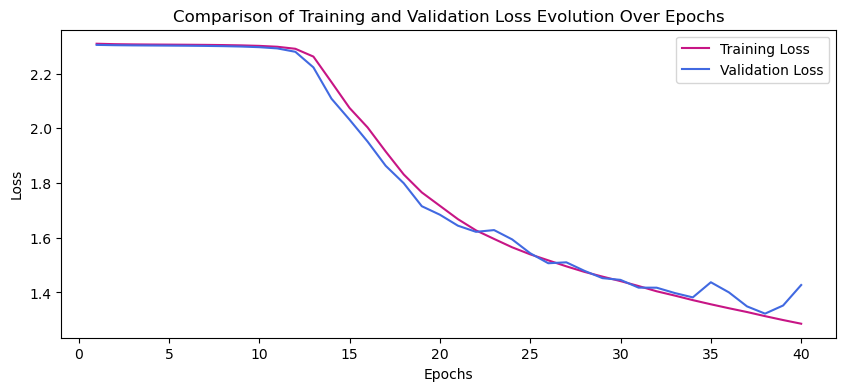

In [56]:
# num_epochs = 40, lr = 0.01, Three convolutional layers, l2 = 0.001, batch_size = 128:  
model_mb92 = CNNNetwork()
loss_train, loss_val_list = model_gd(40, 0.01, model_mb92, 0.001, 128)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.30702, Acc: 7.81% | Validation Loss: 2.30176, Validation Acc: 10.64%
Epoch: 5 | Loss: 2.14040, Acc: 34.38% | Validation Loss: 2.05947, Validation Acc: 26.55%
Epoch: 10 | Loss: 1.78849, Acc: 40.62% | Validation Loss: 1.71474, Validation Acc: 37.93%
Epoch: 15 | Loss: 1.56753, Acc: 42.19% | Validation Loss: 1.49687, Validation Acc: 45.12%
Epoch: 20 | Loss: 1.43383, Acc: 53.12% | Validation Loss: 1.37915, Validation Acc: 50.15%
Epoch: 25 | Loss: 1.33385, Acc: 51.56% | Validation Loss: 1.30104, Validation Acc: 53.21%
Epoch: 30 | Loss: 1.24768, Acc: 56.25% | Validation Loss: 1.23844, Validation Acc: 55.93%
Epoch: 35 | Loss: 1.16509, Acc: 56.25% | Validation Loss: 1.17456, Validation Acc: 58.66%
Epoch: 40 | Loss: 1.08699, Acc: 73.44% | Validation Loss: 1.09107, Validation Acc: 61.37%
Epoch: 45 | Loss: 1.01730, Acc: 71.88% | Validation Loss: 1.03707, Validation Acc: 64.03%
Epoch: 49 | Loss: 0.96802, Acc: 60.94% | Validation Loss: 1.00442, Validation Acc: 65.01%


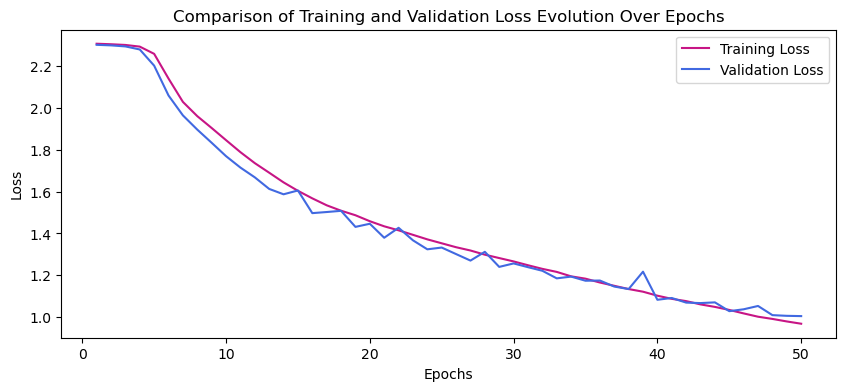

In [57]:
# num_epochs = 50, lr = 0.01, Three convolutional layers with Dropout, dropout = 0.1, l2 = 0.001, batch_size = 128:  
model_mb_drop = CNNNetworkWithDropout(0.1)
loss_train, loss_val_list = model_gd(50, 0.01, model_mb_drop, 0.001, 128)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.04360, Acc: 31.25% | Validation Loss: 2.01798, Validation Acc: 29.46%
Epoch: 5 | Loss: 0.86848, Acc: 70.31% | Validation Loss: 0.90312, Validation Acc: 68.25%
Epoch: 10 | Loss: 0.51170, Acc: 89.06% | Validation Loss: 0.81816, Validation Acc: 72.81%
Early stopping at epoch 15,with 0.81816 validation loss


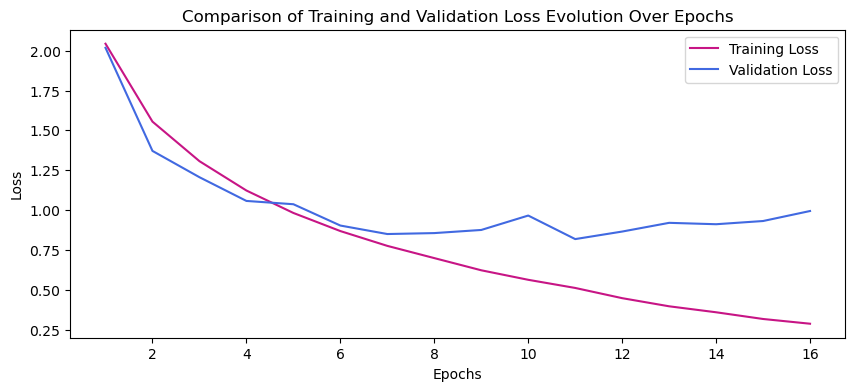

In [58]:
# num_epochs = 20, lr = 0.1, Three convolutional layers, l2 = 0.001, batch_size = 64:  
model_mb12 = CNNNetwork2()
loss_train, loss_val_list = model_gd(20, 0.1, model_mb12, 0.001, 64)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.19968, Acc: 29.69% | Validation Loss: 1.93986, Validation Acc: 29.60%
Epoch: 5 | Loss: 1.34884, Acc: 65.62% | Validation Loss: 1.37542, Validation Acc: 50.57%
Epoch: 10 | Loss: 1.11892, Acc: 50.00% | Validation Loss: 1.14770, Validation Acc: 59.44%
Epoch: 15 | Loss: 1.02674, Acc: 71.88% | Validation Loss: 0.96562, Validation Acc: 66.86%
Epoch: 19 | Loss: 1.00613, Acc: 71.88% | Validation Loss: 0.94964, Validation Acc: 67.26%


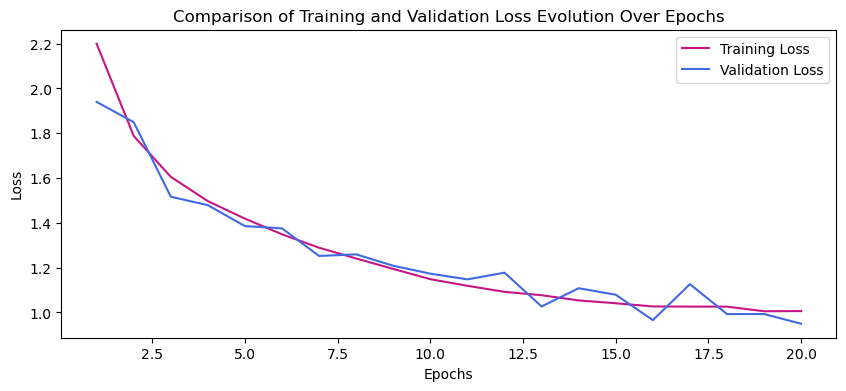

In [59]:
# num_epochs = 20, lr = 0.1, Three convolutional layers, l2 = 0.01, batch_size = 64:  
model_mb13 = CNNNetwork2()
loss_train, loss_val_list = model_gd(20, 0.1, model_mb13, 0.01, 64)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.30297, Acc: 6.25% | Validation Loss: 2.30283, Validation Acc: 9.78%
Epoch: 5 | Loss: 2.30275, Acc: 15.62% | Validation Loss: 2.30315, Validation Acc: 9.73%
Early stopping at epoch 7,with 2.30256 validation loss


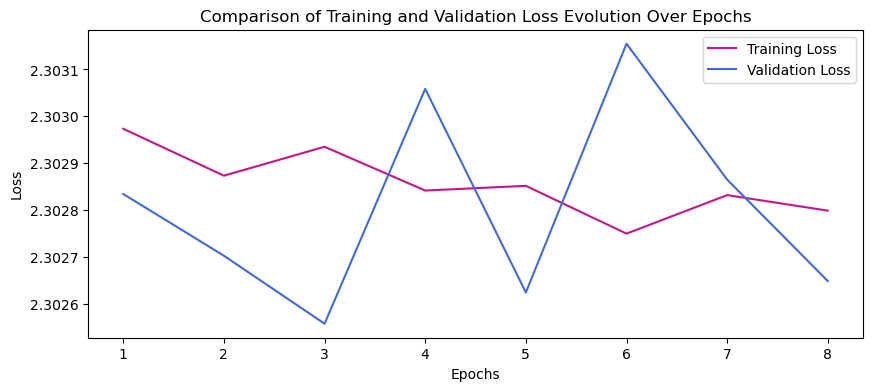

In [60]:
# num_epochs = 20, lr = 0.1, Three convolutional layers, l2 = 0.1, batch_size = 64:  
model_mb14 = CNNNetwork2()
loss_train, loss_val_list = model_gd(20, 0.1, model_mb14, 0.1, 64)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.30294, Acc: 6.25% | Validation Loss: 2.30348, Validation Acc: 10.09%
Epoch: 5 | Loss: 2.30307, Acc: 7.81% | Validation Loss: 2.30261, Validation Acc: 10.09%
Early stopping at epoch 6,with 2.30254 validation loss


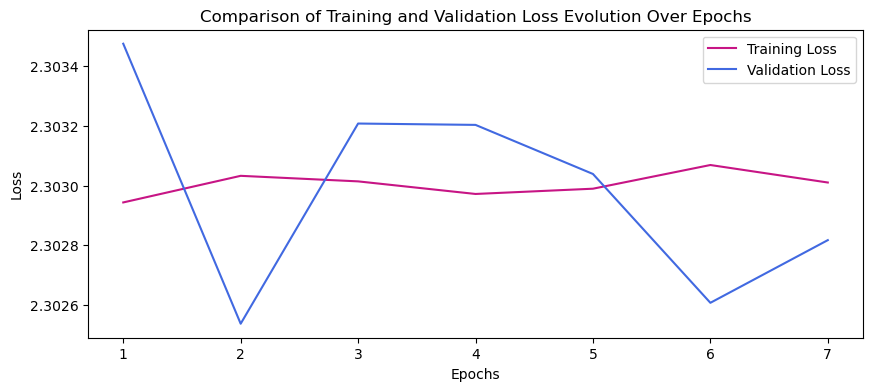

In [61]:
# num_epochs = 20, lr = 0.1, Three convolutional layers, l2 = 0.01, batch_size = 64:  
model_mb132 = CNNNetwork()
loss_train, loss_val_list = model_gd(20, 0.1, model_mb132, 0.01, 64)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.18033, Acc: 32.81% | Validation Loss: 1.96449, Validation Acc: 28.76%
Epoch: 5 | Loss: 1.48343, Acc: 48.44% | Validation Loss: 1.41095, Validation Acc: 48.28%
Epoch: 10 | Loss: 1.31332, Acc: 51.56% | Validation Loss: 1.30281, Validation Acc: 54.49%
Epoch: 15 | Loss: 1.21961, Acc: 50.00% | Validation Loss: 1.08810, Validation Acc: 61.74%
Epoch: 19 | Loss: 1.18923, Acc: 59.38% | Validation Loss: 1.12264, Validation Acc: 60.20%


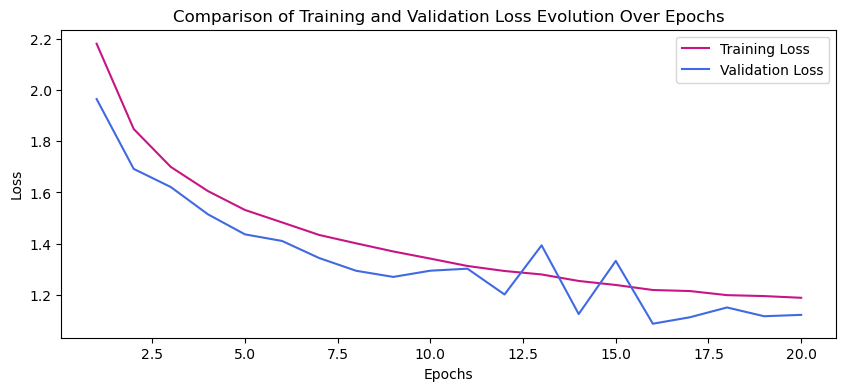

In [62]:
# num_epochs = 20, lr = 0.1, Three convolutional layers with Dropout, dropout = 0.3, l2 = 0.01, batch_size = 64:  
model_mb_drop = CNNNetworkWithDropout(0.3)
loss_train, loss_val_list = model_gd(20, 0.1, model_mb_drop, 0.01, 64)
visualize_loss(loss_train, loss_val_list)

## SGD - Stochastic Gradient Descent:

### Utilizing varied hyperparameters for the model_sgd:

Epoch: 0 | Loss: 2.19664, Acc: 0.00% | Validation Loss: 1.96757, Validation Acc: 25.56%
Epoch: 5 | Loss: 1.21962, Acc: 100.00% | Validation Loss: 1.24044, Validation Acc: 55.49%
Epoch: 10 | Loss: 0.99029, Acc: 100.00% | Validation Loss: 1.18138, Validation Acc: 59.18%
Epoch: 14 | Loss: 0.86630, Acc: 100.00% | Validation Loss: 1.19830, Validation Acc: 59.56%


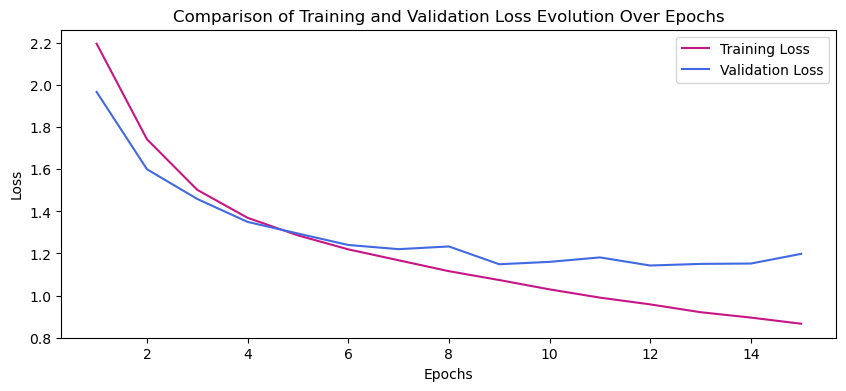

In [63]:
# num_epochs = 15, lr = 0.001, Two convolutional layers, l2 = 0, batch_size = 1:  
model_sgd1 = CNNNetwork()
loss_train, loss_val_list = model_gd(15, 0.001, model_sgd1, 0, 1)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 1.77867, Acc: 0.00% | Validation Loss: 1.54350, Validation Acc: 43.85%
Epoch: 5 | Loss: 1.46910, Acc: 0.00% | Validation Loss: 1.69185, Validation Acc: 43.58%
Epoch: 10 | Loss: 1.55570, Acc: 0.00% | Validation Loss: 1.71335, Validation Acc: 42.75%
Early stopping at epoch 11,with 1.51123 validation loss


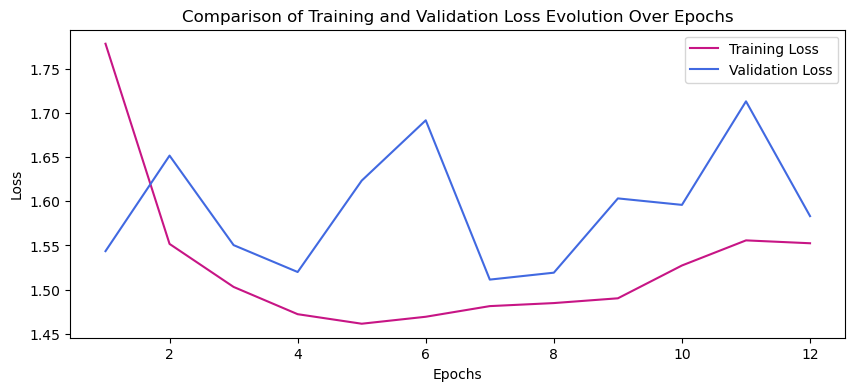

In [64]:
# num_epochs = 15, lr = 0.01, Two convolutional layers, l2 = 0, batch_size = 1:  
model_sgd2 = CNNNetwork()
loss_train, loss_val_list = model_gd(15, 0.01, model_sgd2, 0, 1)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: nan, Acc: 0.00% | Validation Loss: nan, Validation Acc: 10.09%
Early stopping at epoch 4,with inf validation loss


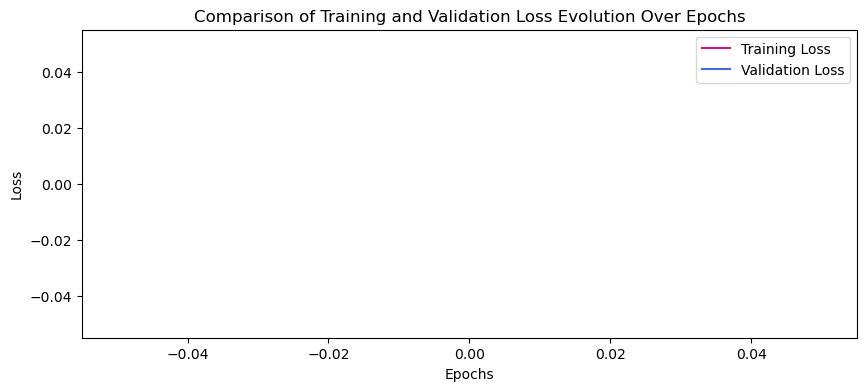

In [65]:
# num_epochs = 15, lr = 0.1, Two convolutional layers, l2 = 0, batch_size = 1: 
model_sgd3 = CNNNetwork()
loss_train, loss_val_list = model_gd(15, 0.1, model_sgd3, 0, 1)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.06509, Acc: 0.00% | Validation Loss: 1.79233, Validation Acc: 34.19%
Epoch: 5 | Loss: 0.88507, Acc: 100.00% | Validation Loss: 0.95809, Validation Acc: 66.63%
Epoch: 10 | Loss: 0.50192, Acc: 100.00% | Validation Loss: 0.82843, Validation Acc: 73.10%
Epoch: 14 | Loss: 0.27884, Acc: 100.00% | Validation Loss: 1.02517, Validation Acc: 71.86%


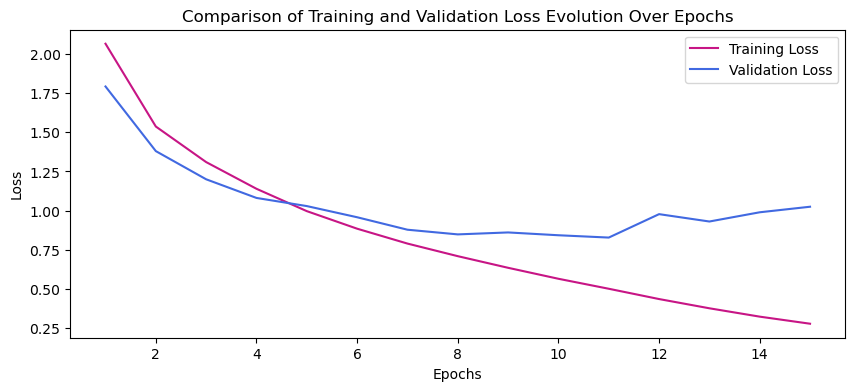

In [66]:
# num_epochs = 15, lr = 0.001, Three convolutional layers, l2 = 0, batch_size = 1: 
model_sgd4 = CNNNetwork2()
loss_train, loss_val_list = model_gd(15, 0.001, model_sgd4, 0, 1)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 1.60342, Acc: 0.00% | Validation Loss: 1.34399, Validation Acc: 52.15%
Epoch: 5 | Loss: 1.03593, Acc: 100.00% | Validation Loss: 1.19152, Validation Acc: 61.25%
Early stopping at epoch 7,with 1.10277 validation loss


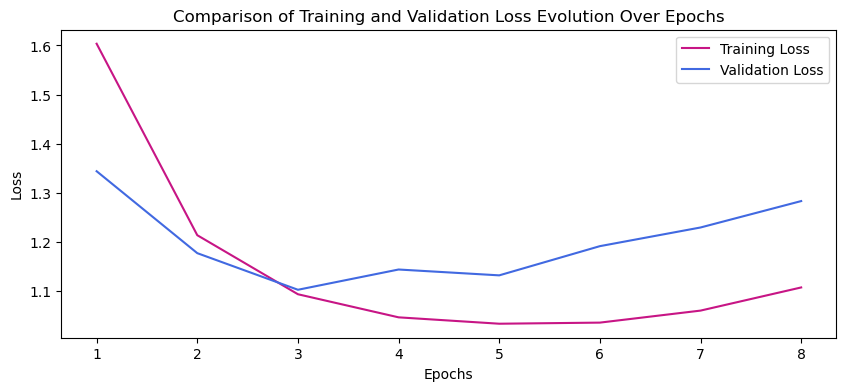

In [67]:
# num_epochs = 15, lr = 0.01, Three convolutional layers, l2 = 0, batch_size = 1: 
model_sgd5 = CNNNetwork2()
loss_train, loss_val_list = model_gd(15, 0.01, model_sgd5, 0, 1)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.32559, Acc: 0.00% | Validation Loss: 2.34139, Validation Acc: 9.78%
Epoch: 5 | Loss: 2.32576, Acc: 0.00% | Validation Loss: 2.35209, Validation Acc: 10.02%
Early stopping at epoch 7,with 2.31228 validation loss


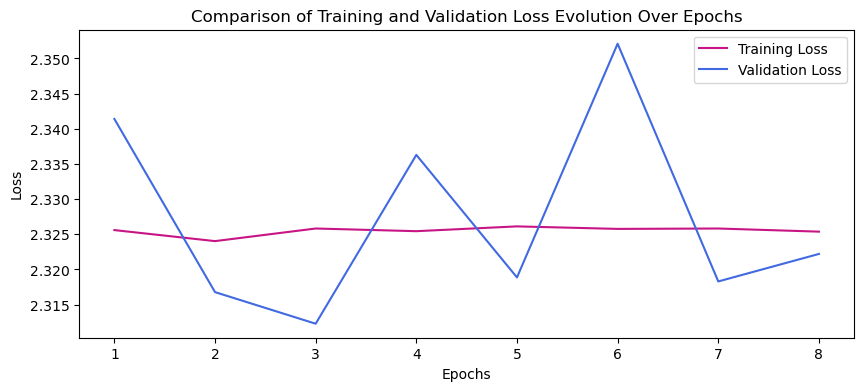

In [68]:
# num_epochs = 15, lr = 0.1, Three convolutional layers, l2 = 0, batch_size = 1: 
model_sgd6 = CNNNetwork2()
loss_train, loss_val_list = model_gd(15, 0.1, model_sgd6, 0, 1)
visualize_loss(loss_train, loss_val_list)

### model_sgd_dropout:

Epoch: 0 | Loss: 1.04303, Acc: 100.00% | Validation Loss: 0.98161, Validation Acc: 65.43%
Epoch: 5 | Loss: 0.64752, Acc: 0.00% | Validation Loss: 0.82173, Validation Acc: 71.56%
Epoch: 9 | Loss: 0.46590, Acc: 100.00% | Validation Loss: 0.81980, Validation Acc: 73.35%


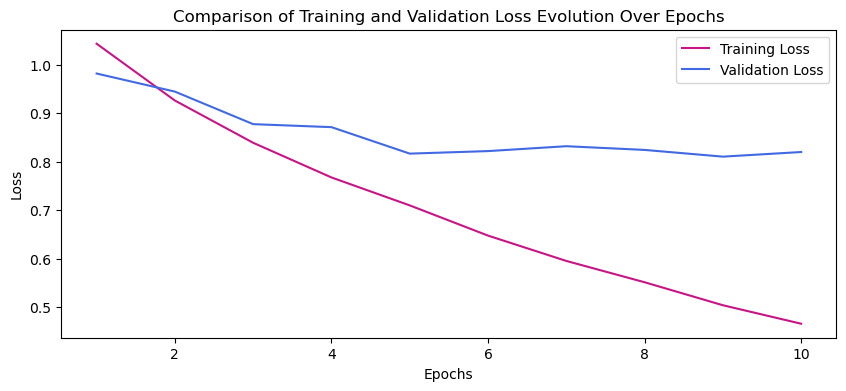

In [69]:
# num_epochs = 10, lr = 0.001, Three convolutional layers with Dropout, dropout = 0.1, l2 = 0, batch_size = 1:  
model_sgd_drop1 = CNNNetworkWithDropout(0.1)
loss_train, loss_val_list = model_gd(10, 0.001, model_mb_drop1, 0, 1)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 1.12110, Acc: 100.00% | Validation Loss: 1.05104, Validation Acc: 62.44%
Epoch: 5 | Loss: 0.78458, Acc: 100.00% | Validation Loss: 0.83376, Validation Acc: 71.07%
Epoch: 9 | Loss: 0.63664, Acc: 100.00% | Validation Loss: 0.80061, Validation Acc: 72.85%


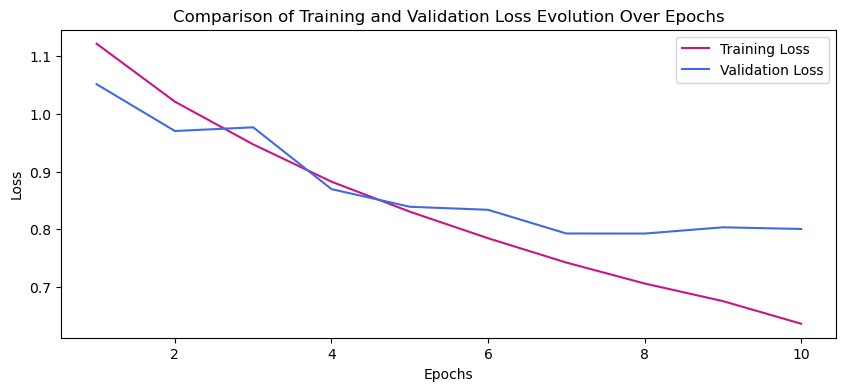

In [70]:
# num_epochs = 10, lr = 0.001, Three convolutional layers with Dropout, dropout = 0.2, l2 = 0, batch_size = 1:  
model_sgd_drop2 = CNNNetworkWithDropout(0.2)
loss_train, loss_val_list = model_gd(10, 0.001, model_mb_drop2, 0, 1)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 1.21039, Acc: 0.00% | Validation Loss: 1.05119, Validation Acc: 63.56%
Epoch: 5 | Loss: 0.87260, Acc: 100.00% | Validation Loss: 0.82287, Validation Acc: 71.32%
Epoch: 9 | Loss: 0.73979, Acc: 100.00% | Validation Loss: 0.77211, Validation Acc: 73.30%


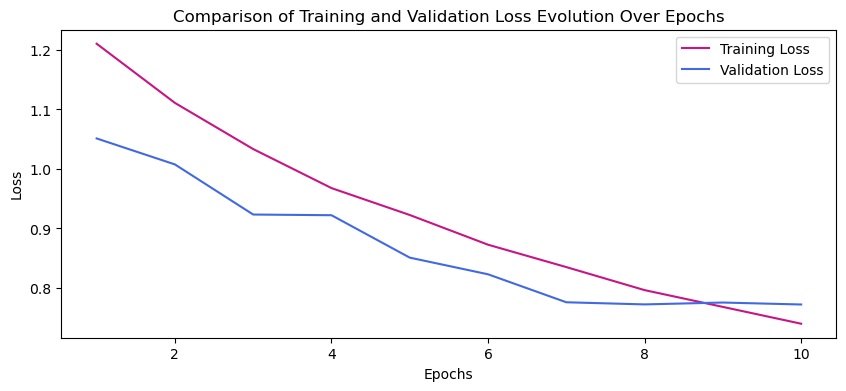

In [71]:
# num_epochs = 10, lr = 0.001, Three convolutional layers with Dropout, dropout = 0.3, l2 = 0, batch_size = 1:  
model_sgd_drop3 = CNNNetworkWithDropout(0.3)
loss_train, loss_val_list = model_gd(10, 0.001, model_mb_drop3, 0, 1)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 1.64252, Acc: 100.00% | Validation Loss: 1.30177, Validation Acc: 54.01%
Epoch: 5 | Loss: 1.21779, Acc: 0.00% | Validation Loss: 1.48224, Validation Acc: 54.81%
Early stopping at epoch 7,with 1.08340 validation loss


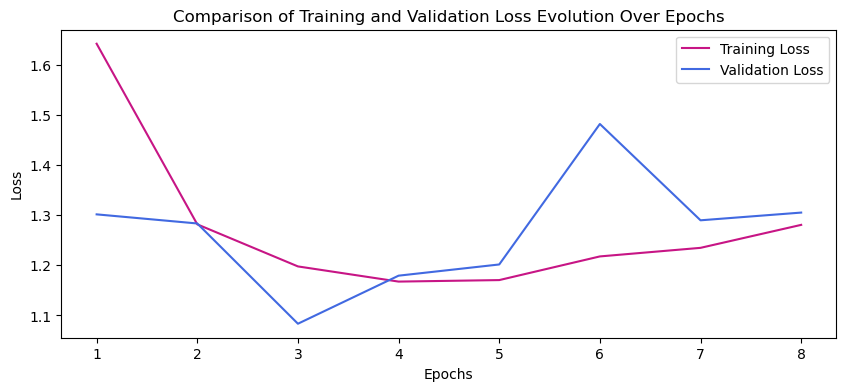

In [72]:
# num_epochs = 10, lr = 0.01, Three convolutional layers with Dropout, dropout = 0.1, l2 = 0, batch_size = 1: 
model_sgd_drop4 = CNNNetworkWithDropout(0.1)
loss_train, loss_val_list = model_gd(10, 0.01, model_sgd_drop4, 0, 1)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 1.69655, Acc: 0.00% | Validation Loss: 1.39295, Validation Acc: 48.71%
Epoch: 5 | Loss: 1.36222, Acc: 0.00% | Validation Loss: 1.26909, Validation Acc: 56.51%
Early stopping at epoch 6,with 1.24840 validation loss


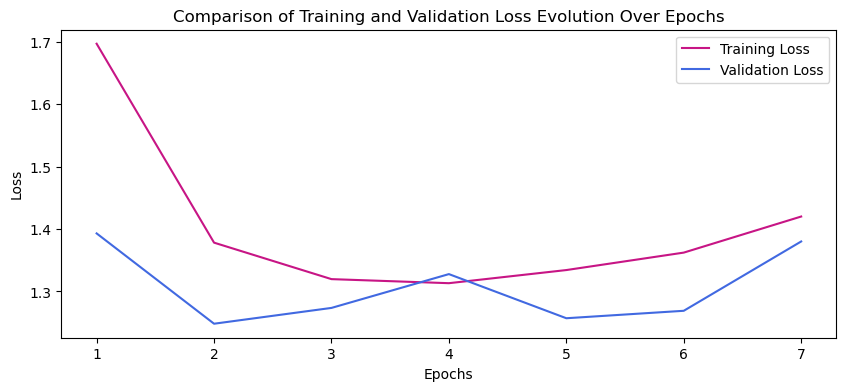

In [73]:
# num_epochs = 10, lr = 0.01, Three convolutional layers with Dropout, dropout = 0.2, l2 = 0, batch_size = 1:  
model_sgd_drop5 = CNNNetworkWithDropout(0.2)
loss_train, loss_val_list = model_gd(10, 0.01, model_sgd_drop5, 0, 1)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 1.71148, Acc: 0.00% | Validation Loss: 1.44524, Validation Acc: 46.88%
Epoch: 5 | Loss: 1.52685, Acc: 0.00% | Validation Loss: 1.46941, Validation Acc: 47.99%
Early stopping at epoch 7,with 1.29342 validation loss


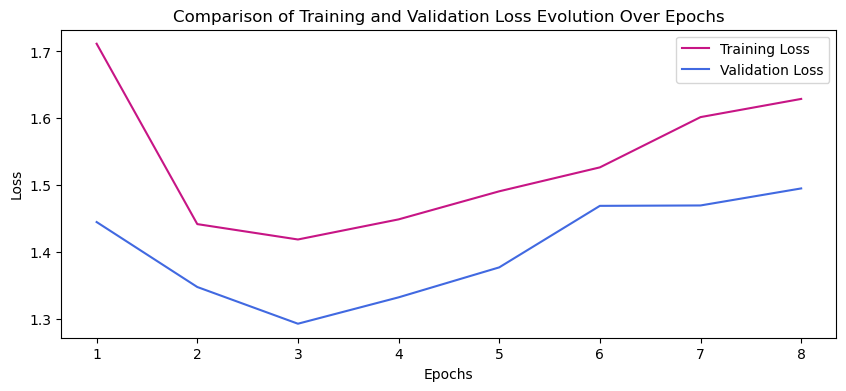

In [74]:
# num_epochs = 10, lr = 0.01, Three convolutional layers with Dropout, dropout = 0.3, l2 = 0, batch_size = 1:  
model_sgd_drop6 = CNNNetworkWithDropout(0.3)
loss_train, loss_val_list = model_gd(10, 0.01, model_sgd_drop6, 0, 1)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.32495, Acc: 0.00% | Validation Loss: 2.33324, Validation Acc: 9.98%
Epoch: 5 | Loss: 2.32488, Acc: 0.00% | Validation Loss: 2.35925, Validation Acc: 10.02%
Epoch: 9 | Loss: 2.32542, Acc: 0.00% | Validation Loss: 2.31337, Validation Acc: 10.44%


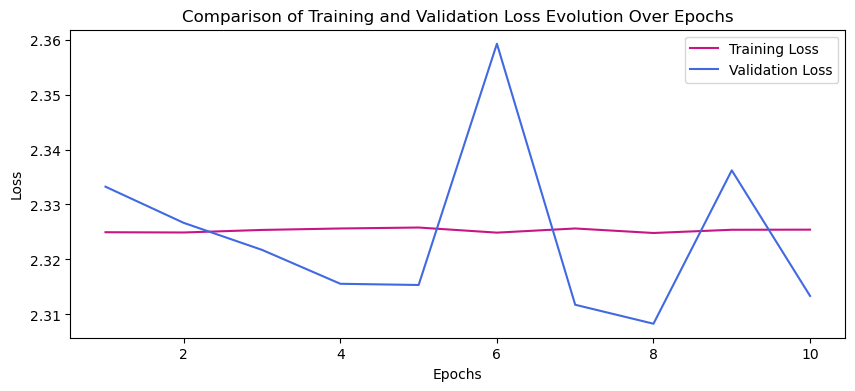

In [75]:
# num_epochs = 10, lr = 0.1, Three convolutional layers with Dropout, dropout = 0.1, l2 = 0, batch_size = 1:  
model_sgd_drop7 = CNNNetworkWithDropout(0.1)
loss_train, loss_val_list = model_gd(10, 0.1, model_sgd_drop7, 0, 1)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: nan, Acc: 100.00% | Validation Loss: nan, Validation Acc: 10.09%
Early stopping at epoch 4,with inf validation loss


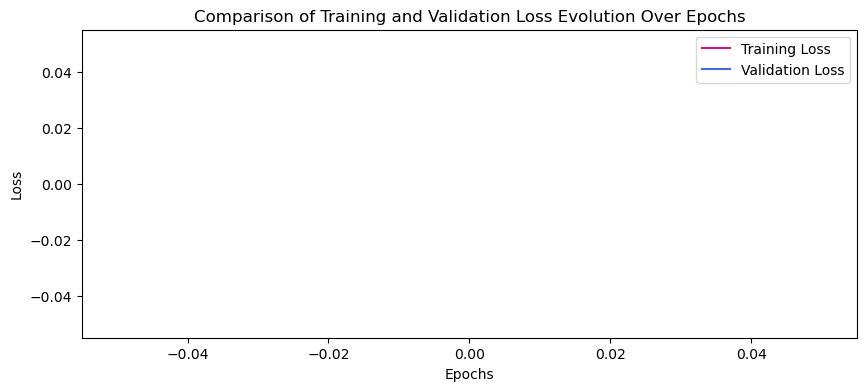

In [76]:
# num_epochs = 10, lr = 0.1, Three convolutional layers with Dropout, dropout = 0.2, l2 = 0, batch_size = 1:  
model_sgd_drop8 = CNNNetworkWithDropout(0.2)
loss_train, loss_val_list = model_gd(10, 0.1, model_sgd_drop8, 0, 1)
visualize_loss(loss_train, loss_val_list)

### model_sgd_l2:

Epoch: 0 | Loss: 2.03926, Acc: 0.00% | Validation Loss: 1.67267, Validation Acc: 38.13%
Epoch: 5 | Loss: 0.86818, Acc: 100.00% | Validation Loss: 0.92047, Validation Acc: 68.40%
Epoch: 9 | Loss: 0.58659, Acc: 100.00% | Validation Loss: 0.80832, Validation Acc: 72.68%


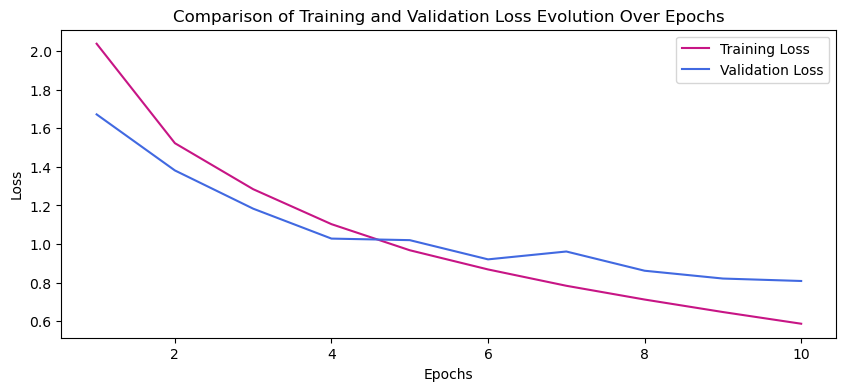

In [78]:
# num_epochs = 10, lr = 0.001, Three convolutional layers, l2 = 0.001, batch_size = 1:  
model_sgd7 = CNNNetwork2()
loss_train, loss_val_list = model_gd(10, 0.001, model_sgd7, 0.001, 1)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.23133, Acc: 100.00% | Validation Loss: 2.02089, Validation Acc: 25.18%
Epoch: 5 | Loss: 1.29796, Acc: 100.00% | Validation Loss: 1.24968, Validation Acc: 54.33%
Epoch: 9 | Loss: 1.06377, Acc: 100.00% | Validation Loss: 1.10021, Validation Acc: 61.17%


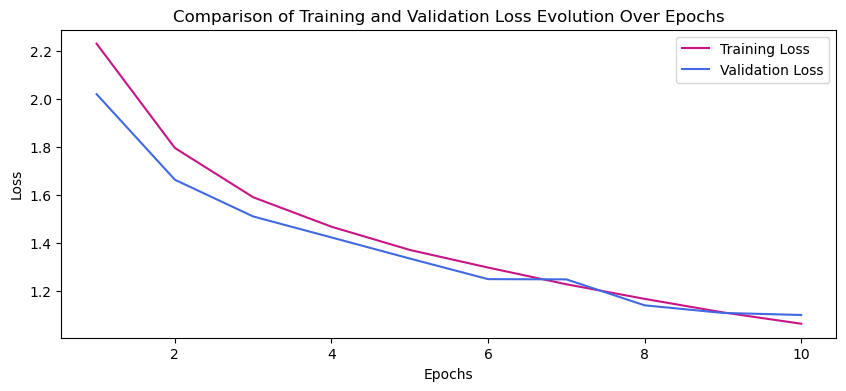

In [79]:
# num_epochs = 10, lr = 0.001, Three convolutional layers, l2 = 0.01, batch_size = 1: 
model_sgd8 = CNNNetwork2()
loss_train, loss_val_list = model_gd(10, 0.001, model_sgd8, 0.01, 1)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.30278, Acc: 100.00% | Validation Loss: 2.30260, Validation Acc: 10.17%
Early stopping at epoch 5,with 2.30260 validation loss


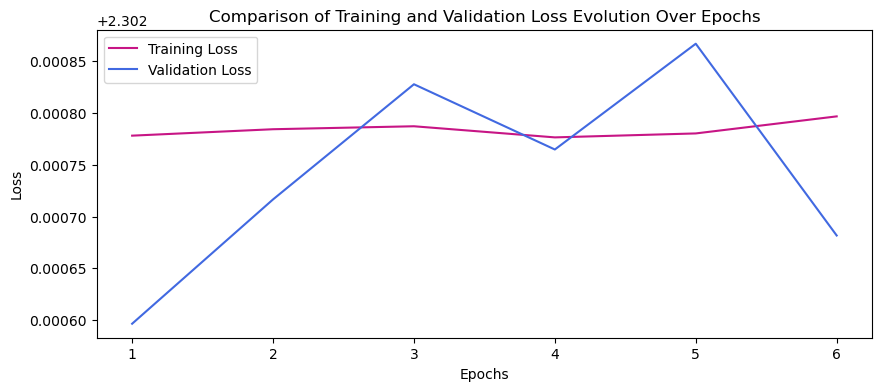

In [80]:
# num_epochs = 10, lr = 0.001, Three convolutional layers, l2 = 0.1, batch_size = 1:  
model_sgd9 = CNNNetwork2()
loss_train, loss_val_list = model_gd(10, 0.001, model_sgd9, 0.1, 1)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.16034, Acc: 0.00% | Validation Loss: 1.92446, Validation Acc: 29.44%
Epoch: 5 | Loss: 1.19103, Acc: 100.00% | Validation Loss: 1.15742, Validation Acc: 58.63%
Epoch: 9 | Loss: 0.94624, Acc: 0.00% | Validation Loss: 0.88671, Validation Acc: 69.03%


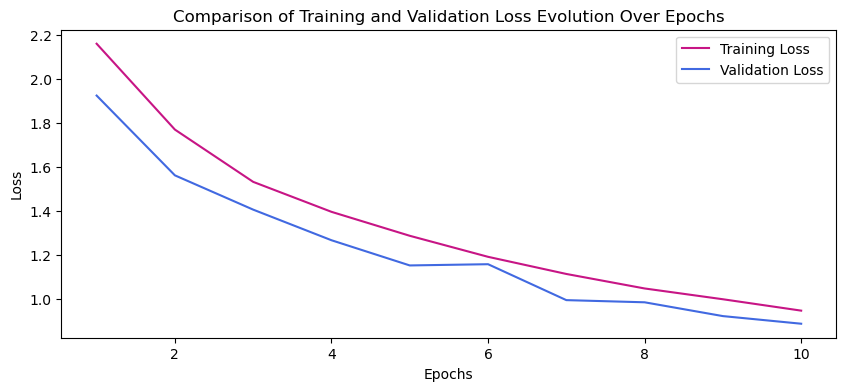

In [81]:
# num_epochs = 10, lr = 0.001, Three convolutional layers with Dropout, dropout = 0.3, l2 = 0.001, batch_size = 1:  
model_sgd_drop32 = CNNNetworkWithDropout(0.3)
loss_train, loss_val_list = model_gd(10, 0.001, model_sgd_drop32, 0.001, 1)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 1.61797, Acc: 100.00% | Validation Loss: 1.43612, Validation Acc: 49.72%
Epoch: 5 | Loss: 0.91747, Acc: 0.00% | Validation Loss: 0.98193, Validation Acc: 65.64%
Epoch: 9 | Loss: 0.83767, Acc: 100.00% | Validation Loss: 0.93769, Validation Acc: 68.60%


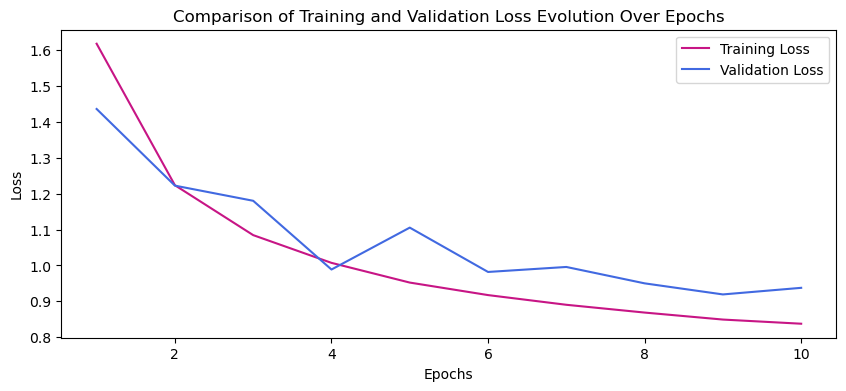

In [82]:
# num_epochs = 10, lr = 0.01, Three convolutional layers, l2 = 0.001, batch_size = 1:  
model_sgd10 = CNNNetwork2()
loss_train, loss_val_list = model_gd(10, 0.01, model_sgd10, 0.001, 1)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 1.84799, Acc: 0.00% | Validation Loss: 1.59595, Validation Acc: 40.75%
Epoch: 5 | Loss: 1.37715, Acc: 100.00% | Validation Loss: 1.33954, Validation Acc: 53.57%
Early stopping at epoch 9,with 1.30403 validation loss


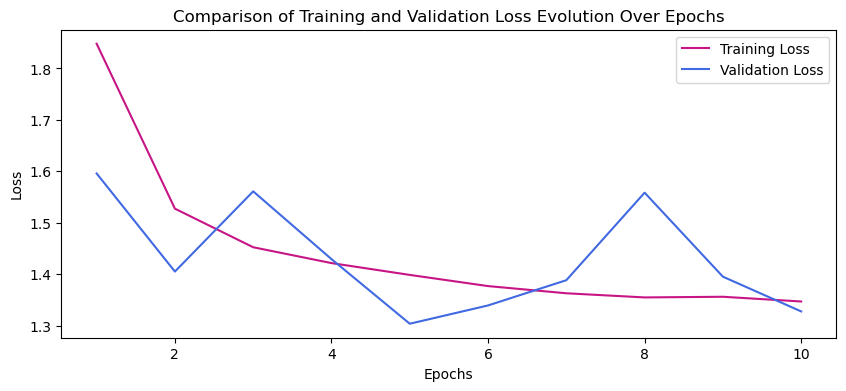

In [83]:
# num_epochs = 10, lr = 0.01, Three convolutional layers, l2 = 0.01, batch_size = 1:  
model_sgd11 = CNNNetwork2()
loss_train, loss_val_list = model_gd(10, 0.01, model_sgd11, 0.01, 1)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.30406, Acc: 0.00% | Validation Loss: 2.30381, Validation Acc: 9.46%
Epoch: 5 | Loss: 2.30357, Acc: 0.00% | Validation Loss: 2.30296, Validation Acc: 10.09%
Epoch: 9 | Loss: 2.30387, Acc: 0.00% | Validation Loss: 2.30320, Validation Acc: 10.13%


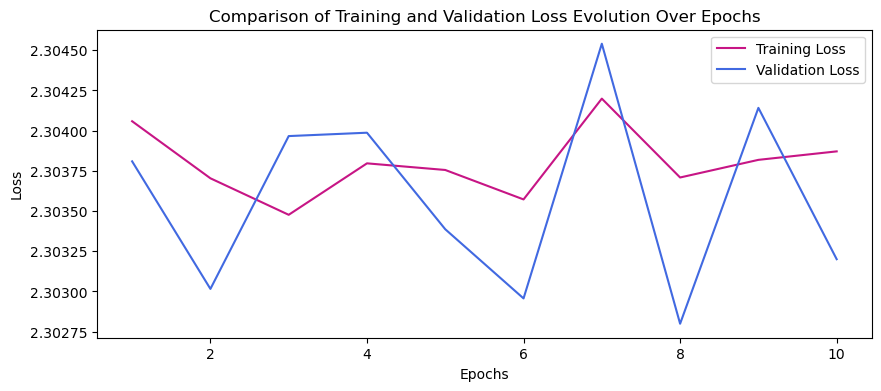

In [84]:
# num_epochs = 10, lr = 0.01, Three convolutional layers, l2 = 0.1, batch_size = 1:  
model_sgd12 = CNNNetwork2()
loss_train, loss_val_list = model_gd(10, 0.01, model_sgd12, 0.1, 1)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 1.73661, Acc: 0.00% | Validation Loss: 1.40165, Validation Acc: 50.21%
Epoch: 5 | Loss: 1.26342, Acc: 100.00% | Validation Loss: 1.12354, Validation Acc: 60.50%
Epoch: 9 | Loss: 1.21135, Acc: 0.00% | Validation Loss: 1.05138, Validation Acc: 63.96%


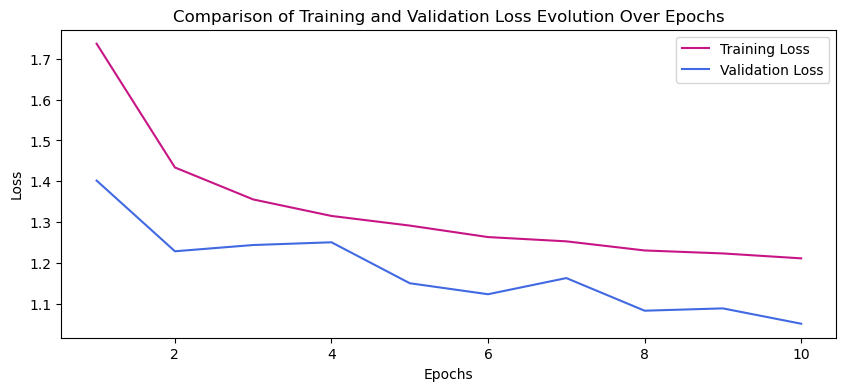

In [85]:
# num_epochs = 10, lr = 0.01, Three convolutional layers with Dropout, dropout = 0.3, l2 = 0.001, batch_size = 1:  
model_sgd_drop101 = CNNNetworkWithDropout(0.3)
loss_train, loss_val_list = model_gd(10, 0.01, model_sgd_drop101, 0.001, 1)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.32444, Acc: 100.00% | Validation Loss: 2.35014, Validation Acc: 9.98%
Epoch: 5 | Loss: 2.32468, Acc: 0.00% | Validation Loss: 2.34525, Validation Acc: 9.78%
Epoch: 9 | Loss: 2.32592, Acc: 100.00% | Validation Loss: 2.31859, Validation Acc: 9.98%


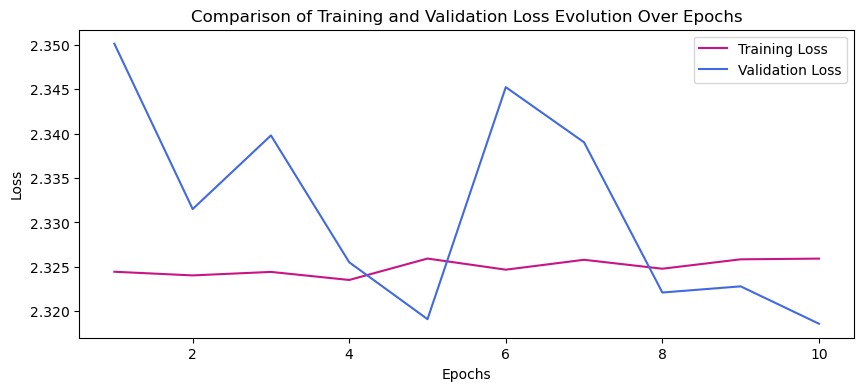

In [86]:
# num_epochs = 10, lr = 0.1, Three convolutional layers, l2 = 0.001, batch_size = 1:  
model_sgd13 = CNNNetwork2()
loss_train, loss_val_list = model_gd(10, 0.1, model_sgd13, 0.001, 1)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.32352, Acc: 0.00% | Validation Loss: 2.32394, Validation Acc: 10.20%
Epoch: 5 | Loss: 2.32353, Acc: 0.00% | Validation Loss: 2.32103, Validation Acc: 9.46%
Epoch: 9 | Loss: 2.32335, Acc: 0.00% | Validation Loss: 2.31747, Validation Acc: 9.78%


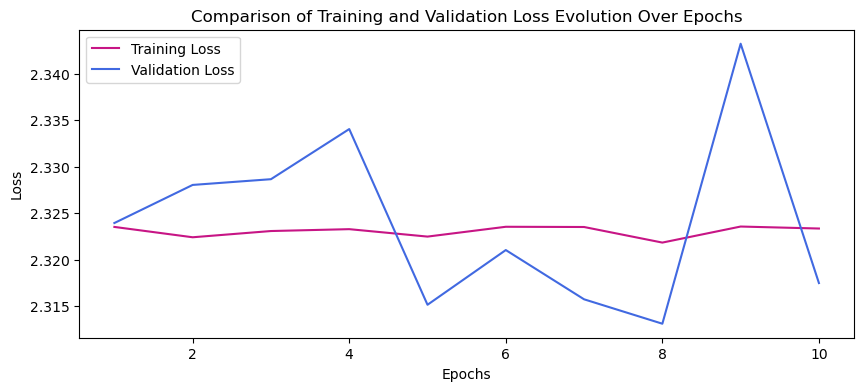

In [87]:
# num_epochs = 10, lr = 0.1, Three convolutional layers, l2 = 0.01, batch_size = 1:  
model_sgd14 = CNNNetwork2()
loss_train, loss_val_list = model_gd(10, 0.1, model_sgd14, 0.01, 1)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.31368, Acc: 0.00% | Validation Loss: 2.32422, Validation Acc: 10.20%
Epoch: 5 | Loss: 2.31354, Acc: 0.00% | Validation Loss: 2.32009, Validation Acc: 10.09%
Epoch: 9 | Loss: 2.31407, Acc: 0.00% | Validation Loss: 2.31464, Validation Acc: 10.20%


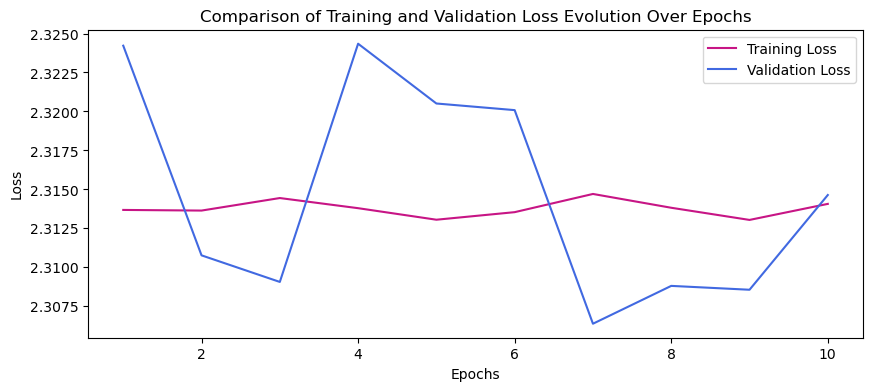

In [88]:
# num_epochs = 10, lr = 0.1, Three convolutional layers, l2 = 0.1, batch_size = 1:  
model_sgd15 = CNNNetwork2()
loss_train, loss_val_list = model_gd(10, 0.1, model_sgd15, 0.1, 1)
visualize_loss(loss_train, loss_val_list)

### <font color="MediumVioletRed">The best model is in the next cell:</font>

Epoch: 0 | Loss: 2.07755, Acc: 28.12% | Validation Loss: 1.86562, Validation Acc: 30.87%
Epoch: 5 | Loss: 1.15794, Acc: 60.94% | Validation Loss: 1.05377, Validation Acc: 63.46%
Epoch: 10 | Loss: 0.93595, Acc: 70.31% | Validation Loss: 0.86150, Validation Acc: 69.99%
Epoch: 15 | Loss: 0.81842, Acc: 81.25% | Validation Loss: 0.76367, Validation Acc: 73.12%
Epoch: 20 | Loss: 0.75345, Acc: 89.06% | Validation Loss: 0.76620, Validation Acc: 73.86%
Epoch: 25 | Loss: 0.70259, Acc: 89.06% | Validation Loss: 0.73738, Validation Acc: 74.70%
Epoch: 29 | Loss: 0.67400, Acc: 81.25% | Validation Loss: 0.72444, Validation Acc: 75.53%


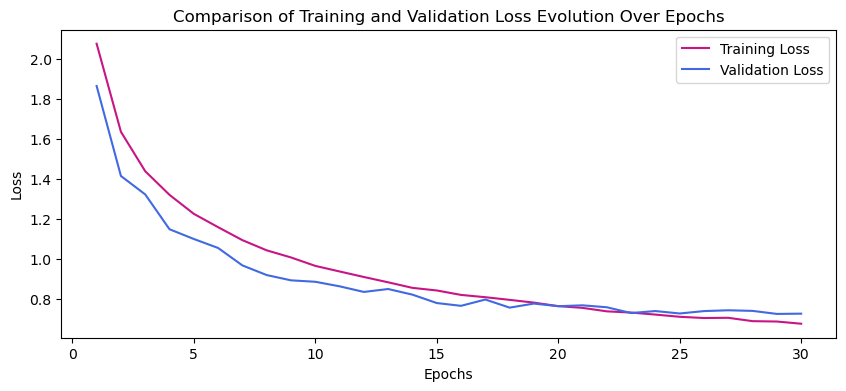

In [90]:
# num_epochs = 30, lr = 0.1, Three convolutional layers with Dropout, dropout = 0.4, l2 = 0, batch_size = 64:  
model_mb_drop = CNNNetworkWithDropout(0.4)
loss_train, loss_val_list = model_gd(30, 0.1, model_mb_drop, 0, 64)
visualize_loss(loss_train, loss_val_list)

## Test The Train Network:

In [91]:
def model_gd_final(epochs, lr, model, l2, batch_size):
    ModelGD = model
    loss_func = nn.CrossEntropyLoss()
    optimizer = optim.SGD(ModelGD.parameters(), lr=lr, weight_decay=l2)
    num_epochs = epochs
    
    train_final_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle = True)
    
    for epoch in range(num_epochs):
        # Training
        ModelGD.train()
        for batch_idx, (data, target) in enumerate(train_final_loader):
           
            # 1. Forward pass
            output = ModelGD(data)
    
            # 2. Calculate loss
            loss = loss_func(output, target)

            # 3. Optimizer zero grad
            optimizer.zero_grad()

            # 4. Loss backwards
            loss.backward()

            # 5. Optimizer step
            optimizer.step()
            
    return ModelGD

In [92]:
def testing(model, test_loader):
    test_loader = test_loader
    loss_func = nn.CrossEntropyLoss()
    # Testing
    model.eval()
    with torch.inference_mode():
        for batch_idx, (data, target) in enumerate(test_loader):
                
            # 1. Forward pass
            output_test = model(data)
            pred_test = torch.softmax(output_test, dim=1).argmax(dim=1)
            
            # 2. Calculate test loss and accuracy
            loss_test = loss_func(output_test, target)
            acc_test = accuracy_index(target, pred_test)
    print(f"Test Loss: {loss_test:.5f}, Test Accuracy: {acc_test:.2f}%")
    return data, target, pred_test

## <font color="MediumVioletRed">Test Results:</font> 

In [93]:
# num_epochs = 30, lr = 0.1, Three convolutional layers with Dropout, dropout = 0.4, l2 = 0, batch_size = 64: 
model_gd_test = CNNNetworkWithDropout(0.4)
model = model_gd_final(30, 0.1, model_gd_test, 0, 64)
data, target, pred_test = testing(model, test_loader)

Test Loss: 0.70979, Test Accuracy: 75.36%


In [99]:
def plot_images(images, labels_true, labels_pred, classes, num_samples = 10):
    plt.figure(figsize=(10, 6))
    for i in range(num_samples):
        plt.subplot(2, 5, i + 1)  # 2 rows, 5 columns
        plt.imshow(np.transpose(images[i], (1, 2, 0)))#, cmap = 'gray') 
        
        # Set the title with individual colors for true and predicted labels
        plt.title('')
        true_label_name = classes[labels_true[i]]
        pred_label_name = classes[labels_pred[i]]
        plt.text(0.5, 1.25, f'True: {true_label_name}', color='seagreen', fontsize=10, ha='center', va='center', transform=plt.gca().transAxes)
        plt.text(0.5, 1.1, f'Predicted: {pred_label_name}', color='mediumvioletred', fontsize=10, ha='center', va='center', transform=plt.gca().transAxes)
        
        plt.axis('off')
    plt.tight_layout()
    clear_output()
    plt.show()

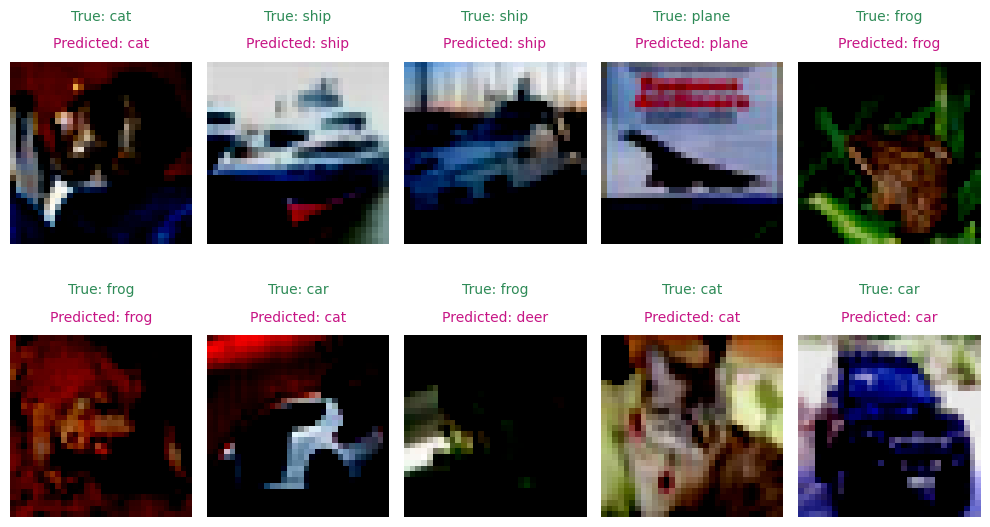

In [105]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
plot_images(data, target, pred_test, classes)

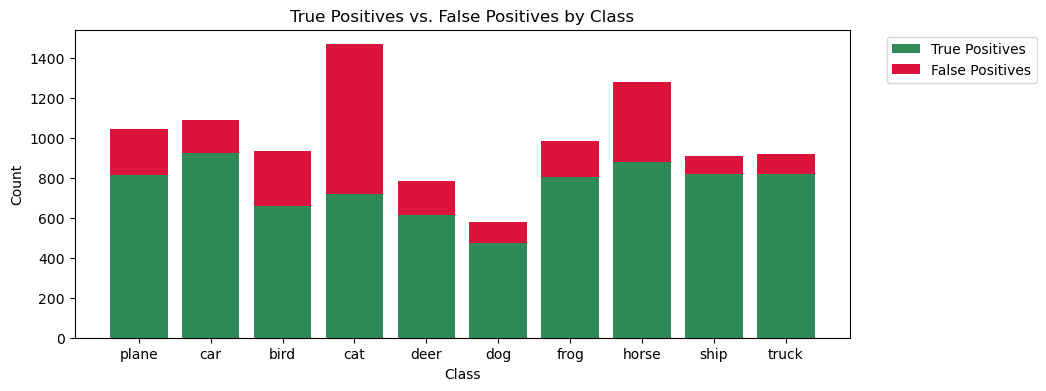

In [111]:
plt.figure(figsize=(10, 4))  
plt.bar(range(len(classes)), true_positives, color='seagreen', label='True Positives')
plt.bar(range(len(classes)), false_positives, bottom=true_positives, color='crimson', label='False Positives')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('True Positives vs. False Positives by Class')  
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1)) 
plt.xticks(range(len(classes)), classes) 
plt.show()